## 고용노동부 공모전 코드

# 1. 데이터

## 1-1. 데이터 불러오기

In [ ]:
# 라이브러리 불러오기 및 코랩 mount하기
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 파이썬 파일 불러오기 (name -> 강소기업 명단, labor -> 고용노동부 공공 데이터)
df_name = pd.read_csv("/content/drive/Shareddrives/고용노동부 공모전/Labor/강소기업 명단.csv", encoding='cp949')
df_labor = pd.read_csv("/content/drive/Shareddrives/고용노동부 공모전/Labor/고용노동부 공공 데이터.csv")

## 1-2. 데이터 전처리

In [ ]:
# 새로운 '규모' 파생변수 추가. 업종 규모를 A~F 등급으로 나눔: 1~4인 -> 'A', 5~9인 -> 'B', 10~29인 -> 'C', 30~99인 -> 'D', 100~299인 -> 'E', 300인 이상 -> 'F' 
df_labor['규모'] = np.where(df_labor['1_규모'] == '1~4인', 'A',
                   np.where(df_labor['1_규모'] == '5~9인','B',
                   np.where(df_labor['1_규모'] == '10~29인','C',
                   np.where(df_labor['1_규모'] == '30~99인','D',
                   np.where(df_labor['1_규모'] == '100~299인','E','F')))))
# 결과 확인
df_labor.head(6)

,1_업종,1_규모,1_전체임금총액,2_질병사망자,2_사고사망자,2_사망만인율,3_사고재해자,3_질병재해자,3_천인율,규모
0,B.광업(05~08),1~4인,3805220.0,22.0,4.0,907.580,24.0,121.0,349.590,A
1,B.광업(05~08),5~9인,3347485.0,15.0,0.0,359.400,18.0,87.0,162.895,B
2,B.광업(05~08),10~29인,4360906.0,18.0,2.0,1108.515,52.0,196.0,523.115,C
3,B.광업(05~08),30~99인,4761588.0,56.0,2.0,513.165,24.0,434.0,523.070,D
4,B.광업(05~08),100~299인,NaN,70.0,1.0,554.345,4.0,582.0,544.335,E
5,B.광업(05~08),300인이상,NaN,159.0,0.0,268.780,11.0,1783.0,381.860,F


In [ ]:
# 평균은 이상치의 영향을 더 많이 받으므로 영향을 덜 받는 중위값을 사용
df_median = df_name.groupby('업종(중분류)')['직원수'].agg(**{'median_직원수':'median'})
df_median # 업종별 직원수 중위값을 나타낸 데이터프레임(같은 규모는 고려 X)

,median_직원수
업종(중분류),
B.광업(05~08),26.0
C.제조업(10~34),46.0
"D.전기, 가스, 증기 및 공기 조절 공급업(35)",36.0
"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",31.0
F.건설업(41~42),47.0
G.도매 및 소매업(45~47),26.0
H.운수 및 창고업(49~52),67.0
I.숙박 및 음식점업(55~56),27.0
J.정보통신업(58~63),17.0


In [ ]:
df_name.query('직원수 != 직원수')[['업종(중분류)','직원수']] #결측값 추출

,업종(중분류),직원수
36,"R.예술, 스포츠 및 여가관련 서비스업(90~91)",NaN
120,C.제조업(10~34),NaN
135,Q.보건업 및 사회복지 서비스업(86~87),NaN
158,"R.예술, 스포츠 및 여가관련 서비스업(90~91)",NaN
206,Q.보건업 및 사회복지 서비스업(86~87),NaN
207,L.부동산업(68),NaN
212,"N.사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",NaN
218,"N.사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",NaN
221,Q.보건업 및 사회복지 서비스업(86~87),NaN
223,Q.보건업 및 사회복지 서비스업(86~87),NaN


In [ ]:
R = df_median['median_직원수']['R.예술, 스포츠 및 여가관련 서비스업(90~91)']
df_name['직원수'][36] = R
df_name['직원수'][158] = R

C = df_median['median_직원수']['C.제조업(10~34)']
df_name['직원수'][120] = C

L = df_median['median_직원수']['L.부동산업(68)']
df_name['직원수'][207] = L

S = df_median['median_직원수']['S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)']
df_name['직원수'][265] = S

I = df_median['median_직원수']['I.숙박 및 음식점업(55~56)']
df_name['직원수'][237] = I
df_name['직원수'][284] = I

P = df_median['median_직원수']['P.교육 서비스업(85)']
df_name['직원수'][226] = P
df_name['직원수'][425] = P

N = df_median['median_직원수']['N.사업시설 관리, 사업 지원 및 임대 서비스업(74~76)']
df_name['직원수'][212] = N
df_name['직원수'][218] = N

Q = df_median['median_직원수']['Q.보건업 및 사회복지 서비스업(86~87)']
df_name['직원수'][135] = Q
df_name['직원수'][206] = Q
df_name['직원수'][221] = Q
df_name['직원수'][223] = Q
df_name['직원수'][498] = Q

# 결과 확인 -> 결측값 더 이상 존재하지 않음
df_name.query('직원수 != 직원수')[['업종(중분류)','직원수']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/di

,업종(중분류),직원수


In [ ]:
# 기업데이터의 '직원수' 범주화. 새로운 파생변수 '규모' 형성. A~F 기준은 위와 동일
df_name['규모'] = np.where(df_name['직원수'] >= 300, 'F',
                  np.where(df_name['직원수'] >= 100,'E',
                  np.where(df_name['직원수'] >= 30,'D',
                  np.where(df_name['직원수'] >= 10,'C',
                  np.where(df_name['직원수'] >= 5, 'B','A')))))
# 결과 확인
df_name.head(20)

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종(중분류),업종(소분류),주소,직원수,임금(월),...,순이익증가율,총자산순이익율,부채비율,총자본회전율,워라밸,자아실현,육아휴직,사내 육아 \n시설/서비스,사내 장애인\n시설/서비스,규모
0,2022-15091,가족친화인증기업,주식회사 티움피엠씨,2898800386,이찬희,L.부동산업(68),부동산 임대 및 공급업,서울특별시 강남구 삼성로 5708층 (석천빌딩),10.0,2500000.000,...,NaN,-48.8,NaN,0.2,4.0,4.0,1,0,1,C
1,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,-20.5,3.3,96.5,0.7,3.0,3.0,1,0,0,D
2,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,NaN,...,-75.1,2.7,205.5,0.5,2.0,2.0,0,0,0,C
3,2022-14411,사회적기업,협동조합 꿈꾸는 문화놀이터 뜻,1318647701,정윤호,"R.예술, 스포츠 및 여가관련 서비스업(90~91)",창작 및 예술관련 서비스업,인천광역시 남동구 인주대로888번길 36(만수동) 3층 301호,3.0,2500000.000,...,339.2,19.1,138.0,1.9,1.0,3.0,1,1,1,A
4,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,11.6,5.1,81.8,1.9,2.0,2.3,1,0,1,C
5,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,74.0,8.6,61.1,0.6,3.0,2.0,1,0,0,C
6,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,NaN,3.7,51.0,0.6,NaN,NaN,0,0,0,C
7,2022-02642,이노비즈기업,한성에스앤아이(주),6208115005,정우영,"N.사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",기타 사업지원 서비스업,"경남 창원시 마산회원구 봉암북7길 212동 301호(봉암동, 경상남도지능형홈산업화센터)",236.0,1750000.000,...,NaN,17.8,113.4,1.1,2.3,1.8,1,1,1,E
8,2022-16507,안전보건경영시스템 인증,한산기전(주)삼천포사업소,6138149680,조현수,"D.전기, 가스, 증기 및 공기 조절 공급업(35)",전기업,"경상남도 사천시 삼천포대교로 5031310호 (동림동, 현대주택)",36.0,3600000.000,...,420.0,11.7,28.8,2.4,5.0,1.0,1,1,1,D
9,2022-03795,이노비즈기업,한산 시피에스(주),1078166020,"이기웅, 김용강",F.건설업(41~42),건설업본사(소분류),"경기 광명시 하안로 60비동 809, 810호 (소하동, 광명테크노파크)",23.0,3366666.667,...,85.3,5.3,29.3,1.7,NaN,NaN,1,1,1,C


# 2. 데이터 결측값 전처리

## 2-1. 기업 데이터 전처리

In [ ]:
# 변수명 간단하게 변경
df_name = df_name.rename(columns = {'수평적 조직문화' : '수평적_조직문화'})
df_name = df_name.rename(columns = {'업종(중분류)' : '업종'})

## 수평적_조직문화 결측치 처리
#업종과 규모별 median으로 결측치 대체-> 10개의 결측치 남음
fill_median_func = lambda g: g.fillna(g.median())
df_name['수평적_조직문화']=df_name.groupby(['업종','규모'])['수평적_조직문화'].apply(fill_median_func)
print(df_name['수평적_조직문화'].isna().sum())

# 업종별 결측치 대체 -> 9개 남음
df_name['수평적_조직문화']=df_name.groupby(['업종'])['수평적_조직문화'].apply(fill_median_func)
print(df_name[['수평적_조직문화']].isna().sum())

#규모별 결측치 대체 -> 모두 제거 완료
df_name['수평적_조직문화']=df_name.groupby(['규모'])['수평적_조직문화'].apply(fill_median_func)
print(df_name[['수평적_조직문화']].isna().sum())

df_name[df_name['수평적_조직문화'].isnull()] #업종 중앙값 결측치 더 이상 없을을 확인

10
수평적_조직문화    9
dtype: int64
수평적_조직문화    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,순이익증가율,총자산순이익율,부채비율,총자본회전율,워라밸,자아실현,육아휴직,사내 육아 \n시설/서비스,사내 장애인\n시설/서비스,규모


In [ ]:
## 순이익증가율 결측치 처리
#업종과 규모별 median으로 결측치 대체-> 3개의 결측치 남음
fill_median_func = lambda g: g.fillna(g.median())
df_name['순이익증가율']=df_name.groupby(['업종','규모'])['순이익증가율'].apply(fill_median_func)
print(df_name['순이익증가율'].isna().sum())

# 업종별 결측치 대체 -> 모두 제거 완료
df_name['순이익증가율']=df_name.groupby(['업종'])['순이익증가율'].apply(fill_median_func)
print(df_name[['순이익증가율']].isna().sum())

df_name[df_name['순이익증가율'].isnull()] #업종 중앙값 결측치 더 이상 없을을 확인

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


3
순이익증가율    0
dtype: int64


,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,순이익증가율,총자산순이익율,부채비율,총자본회전율,워라밸,자아실현,육아휴직,사내 육아 \n시설/서비스,사내 장애인\n시설/서비스,규모


In [ ]:
## 총자산순이익율 결측치 처리
#업종과 규모별 median으로 결측치 대체-> 모두 제거 완료
fill_median_func = lambda g: g.fillna(g.median())
df_name['총자산순이익율']=df_name.groupby(['업종','규모'])['총자산순이익율'].apply(fill_median_func)
print(df_name['총자산순이익율'].isna().sum())

df_name[df_name['총자산순이익율'].isnull()] #업종 중앙값 결측치 더 이상 없을을 확인

0


,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,순이익증가율,총자산순이익율,부채비율,총자본회전율,워라밸,자아실현,육아휴직,사내 육아 \n시설/서비스,사내 장애인\n시설/서비스,규모


In [ ]:
## 부채비율 결측치 처리
#업종과 규모별 median으로 결측치 대체-> 모두 제거 완료
fill_median_func = lambda g: g.fillna(g.median())
df_name['부채비율']=df_name.groupby(['업종','규모'])['부채비율'].apply(fill_median_func)
print(df_name['부채비율'].isna().sum())

df_name[df_name['부채비율'].isnull()] #업종 중앙값 결측치 더 이상 없을을 확인

0


,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,순이익증가율,총자산순이익율,부채비율,총자본회전율,워라밸,자아실현,육아휴직,사내 육아 \n시설/서비스,사내 장애인\n시설/서비스,규모


In [ ]:
## 총자본회전율 결측치 처리
#업종과 규모별 median으로 결측치 대체-> 결측치 3개
fill_median_func = lambda g: g.fillna(g.median())
df_name['총자본회전율']=df_name.groupby(['업종','규모'])['총자본회전율'].apply(fill_median_func)
print(df_name['총자본회전율'].isna().sum())

# 업종별 결측치 대체 -> 모두 제거 완료
df_name['총자본회전율']=df_name.groupby(['업종'])['총자본회전율'].apply(fill_median_func)
print(df_name[['총자본회전율']].isna().sum())

df_name[df_name['총자본회전율'].isnull()] #업종 중앙값 결측치 더 이상 없을을 확인

3
총자본회전율    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,순이익증가율,총자산순이익율,부채비율,총자본회전율,워라밸,자아실현,육아휴직,사내 육아 \n시설/서비스,사내 장애인\n시설/서비스,규모


In [ ]:
## 워라밸 결측치 처리
#업종과 규모별 median으로 결측치 대체-> 결측치 10개
fill_median_func = lambda g: g.fillna(g.median())
df_name['워라밸']=df_name.groupby(['업종','규모'])['워라밸'].apply(fill_median_func)
print(df_name['워라밸'].isna().sum())

# 업종별 결측치 대체 -> 9개 남음
df_name['워라밸']=df_name.groupby(['업종'])['워라밸'].apply(fill_median_func)
print(df_name[['워라밸']].isna().sum())

#규모별 결측치 대체 -> 모두 제거 완료
df_name['워라밸']=df_name.groupby(['규모'])['워라밸'].apply(fill_median_func)
print(df_name[['워라밸']].isna().sum())

df_name[df_name['워라밸'].isnull()] #업종 중앙값 결측치 더 이상 없을을 확인

10
워라밸    9
dtype: int64
워라밸    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,순이익증가율,총자산순이익율,부채비율,총자본회전율,워라밸,자아실현,육아휴직,사내 육아 \n시설/서비스,사내 장애인\n시설/서비스,규모


In [ ]:
## 자아실현 결측치 처리
#업종과 규모별 median으로 결측치 대체-> 결측치 3개
fill_median_func = lambda g: g.fillna(g.median())
df_name['자아실현']=df_name.groupby(['업종','규모'])['자아실현'].apply(fill_median_func)
print(df_name['자아실현'].isna().sum())

# 업종별 결측치 대체 -> 9개 남음
df_name['자아실현']=df_name.groupby(['업종'])['자아실현'].apply(fill_median_func)
print(df_name[['자아실현']].isna().sum())

# 규모별 결측치 대체 -> 모두 제거 완료
df_name['자아실현']=df_name.groupby(['규모'])['자아실현'].apply(fill_median_func)
print(df_name[['자아실현']].isna().sum())

df_name[df_name['자아실현'].isnull()] # 업종 중앙값 결측치 더 이상 없을을 확인

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


10
자아실현    9
dtype: int64
자아실현    0
dtype: int64


,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,순이익증가율,총자산순이익율,부채비율,총자본회전율,워라밸,자아실현,육아휴직,사내 육아 \n시설/서비스,사내 장애인\n시설/서비스,규모


In [ ]:
## 기업 임금 결측치 처리
# 업종과 규모별 median으로 결측치 대체-> 결측치 2개
fill_median_func = lambda g: g.fillna(g.median())
df_name['임금(월)']=df_name.groupby(['업종','규모'])['임금(월)'].apply(fill_median_func)
print(df_name['임금(월)'].isna().sum())

# 업종별 결측치 대체 -> 모두 제거 완료
df_name['임금(월)']=df_name.groupby(['업종'])['임금(월)'].apply(fill_median_func)
print(df_name[['임금(월)']].isna().sum())

df_name[df_name['임금(월)'].isnull()] # 업종 중앙값 결측치 더 이상 없을을 확인

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


2
임금(월)    0
dtype: int64


,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,순이익증가율,총자산순이익율,부채비율,총자본회전율,워라밸,자아실현,육아휴직,사내 육아 \n시설/서비스,사내 장애인\n시설/서비스,규모


기업데이터: 재무제표 4개 지표를 IQR 방식으로 제거

In [ ]:

def get_outlier(df=None, column= None, weight=1.5):
          quantile_25 = np.percentile(df[column].values, 25)
          quantile_75 = np.percentile(df[column].values, 75)
          IQR = quantile_75 - quantile_25
          IQR_weight = IQR*weight
  
          lowest = quantile_25 - IQR_weight
          highest = quantile_75 + IQR_weight
  
          outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
          return outlier_idx    

oulier_idx1 = get_outlier(df=df_name, column='순이익증가율', weight=1.5)
oulier_idx2 = get_outlier(df=df_name, column='총자산순이익율', weight=1.5)
oulier_idx3 = get_outlier(df=df_name, column='부채비율', weight=1.5)
oulier_idx4 = get_outlier(df=df_name, column='총자본회전율', weight=1.5)
    

oulier_idx2=oulier_idx1.union(oulier_idx2)
oulier_idx3=oulier_idx2.union(oulier_idx3)
oulier_idx4=oulier_idx3.union(oulier_idx4)    

df_name=df_name.drop(oulier_idx4)

## 2-2. 공공 데이터 전처리

In [ ]:
# KNN imputer를 통해 공공데이터 결측값 처리
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) # n_neighbors는 5가 dafault 값
data_filled = imputer.fit_transform(df_labor[['2_질병사망자','2_사고사망자','3_사고재해자','3_질병재해자']])
data_filled = pd.DataFrame(data_filled)
data_filled.columns = ['2_질병사망자','2_사고사망자','3_사고재해자','3_질병재해자']

df_labor['2_질병사망자'] = data_filled['2_질병사망자']
df_labor['2_사고사망자'] = data_filled['2_사고사망자']
df_labor['3_사고재해자'] = data_filled['3_사고재해자']
df_labor['3_질병재해자'] = data_filled['3_질병재해자']
df_labor

,1_업종,1_규모,1_전체임금총액,2_질병사망자,2_사고사망자,2_사망만인율,3_사고재해자,3_질병재해자,3_천인율,규모
0,B.광업(05~08),1~4인,3805220.0,22.0,4.0,907.5800,24.0,121.0,349.590,A
1,B.광업(05~08),5~9인,3347485.0,15.0,0.0,359.4000,18.0,87.0,162.895,B
2,B.광업(05~08),10~29인,4360906.0,18.0,2.0,1108.5150,52.0,196.0,523.115,C
3,B.광업(05~08),30~99인,4761588.0,56.0,2.0,513.1650,24.0,434.0,523.070,D
4,B.광업(05~08),100~299인,NaN,70.0,1.0,554.3450,4.0,582.0,544.335,E
...,...,...,...,...,...,...,...,...,...,...
97,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",5~9인,2618072.0,2.0,1.0,0.9100,236.0,55.0,5.160,B
98,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",10~29인,3085493.0,4.0,1.0,0.4325,244.0,65.0,3.505,C
99,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",30~99인,3383215.0,1.0,0.0,0.2675,137.0,32.0,2.830,D
100,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",100~299인,4674394.0,4.0,1.0,0.3400,72.0,17.0,1.290,E


In [ ]:
# 데이터를 바탕으로 사망만인율 처리
data_not_null = df_labor[df_labor['2_사망만인율'].notnull()]
data_null = df_labor[df_labor['2_사망만인율'].isnull()]

x = data_not_null[['2_질병사망자','2_사고사망자']]
y = data_not_null[['2_사망만인율']]

from sklearn.linear_model import LinearRegression
mlr = LinearRegression() # 다중회귀
mlr.fit(x, y)

test_data = data_null[['2_질병사망자','2_사고사망자']]

y_predict = mlr.predict(test_data)

data_null['2_사망만인율'] = y_predict

df_labor = pd.concat([data_not_null,data_null], axis=0).sort_values('1_업종',ascending=True)
df_labor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,1_업종,1_규모,1_전체임금총액,2_질병사망자,2_사고사망자,2_사망만인율,3_사고재해자,3_질병재해자,3_천인율,규모
0,B.광업(05~08),1~4인,3805220.0,22.0,4.0,907.5800,24.0,121.0,349.590,A
1,B.광업(05~08),5~9인,3347485.0,15.0,0.0,359.4000,18.0,87.0,162.895,B
2,B.광업(05~08),10~29인,4360906.0,18.0,2.0,1108.5150,52.0,196.0,523.115,C
3,B.광업(05~08),30~99인,4761588.0,56.0,2.0,513.1650,24.0,434.0,523.070,D
4,B.광업(05~08),100~299인,NaN,70.0,1.0,554.3450,4.0,582.0,544.335,E
...,...,...,...,...,...,...,...,...,...,...
101,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",300인이상,4306688.0,5.0,1.0,0.2730,30.0,17.0,1.900,F
100,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",100~299인,4674394.0,4.0,1.0,0.3400,72.0,17.0,1.290,E
99,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",30~99인,3383215.0,1.0,0.0,0.2675,137.0,32.0,2.830,D
98,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",10~29인,3085493.0,4.0,1.0,0.4325,244.0,65.0,3.505,C


In [ ]:
# 데이터를 바탕으로 천인율 처리
data_not_null_1 = df_labor[df_labor['3_천인율'].notnull()]
data_null_1 = df_labor[df_labor['3_천인율'].isnull()]

x_1 = data_not_null_1[['3_질병재해자','3_사고재해자']]
y_1 = data_not_null_1[['3_천인율']]

from sklearn.linear_model import LinearRegression
mlr_1 = LinearRegression() # 다중회귀
mlr_1.fit(x_1, y_1)

test_data_1 = data_null_1[['3_질병재해자','3_사고재해자']]

y_predict_1 = mlr_1.predict(test_data_1)

data_null_1['3_천인율'] = y_predict_1

df_labor = pd.concat([data_not_null_1,data_null_1], axis=0).sort_values('1_업종',ascending=True)
df_labor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,1_업종,1_규모,1_전체임금총액,2_질병사망자,2_사고사망자,2_사망만인율,3_사고재해자,3_질병재해자,3_천인율,규모
0,B.광업(05~08),1~4인,3805220.0,22.0,4.0,907.5800,24.0,121.0,349.590,A
1,B.광업(05~08),5~9인,3347485.0,15.0,0.0,359.4000,18.0,87.0,162.895,B
2,B.광업(05~08),10~29인,4360906.0,18.0,2.0,1108.5150,52.0,196.0,523.115,C
3,B.광업(05~08),30~99인,4761588.0,56.0,2.0,513.1650,24.0,434.0,523.070,D
4,B.광업(05~08),100~299인,NaN,70.0,1.0,554.3450,4.0,582.0,544.335,E
...,...,...,...,...,...,...,...,...,...,...
97,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",5~9인,2618072.0,2.0,1.0,0.9100,236.0,55.0,5.160,B
98,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",10~29인,3085493.0,4.0,1.0,0.4325,244.0,65.0,3.505,C
99,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",30~99인,3383215.0,1.0,0.0,0.2675,137.0,32.0,2.830,D
100,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",100~299인,4674394.0,4.0,1.0,0.3400,72.0,17.0,1.290,E


In [ ]:
# 전체임금 결측치 처리 -> 결측치 위치 및 업종 확인
df_labor.loc[df_labor['1_전체임금총액'].isnull()]

,1_업종,1_규모,1_전체임금총액,2_질병사망자,2_사고사망자,2_사망만인율,3_사고재해자,3_질병재해자,3_천인율,규모
4,B.광업(05~08),100~299인,NaN,70.0,1.0,554.345000,4.0,582.0,544.335000,E
5,B.광업(05~08),300인이상,NaN,159.0,0.0,268.780000,11.0,1783.0,381.860000,F
23,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",300인이상,NaN,3.0,1.8,21.932774,14.0,6.8,27.285819,F


In [ ]:
df_labor_new = df_labor.loc[df_labor['1_전체임금총액'].notnull()] # 결측치가 아닌 데이터 분류
df_labor_new.groupby('1_업종')\
.agg(mean_임금 = ('1_전체임금총액','mean'))\
.sort_values('mean_임금', ascending = False) # 내림차순 정렬

# 결측치가 있는 B.광업은 G와 C 사이에, E는 C와 F 사이에 있다

,mean_임금
1_업종,
K.금융 및 보험업(64~66),6.124700e+06
"D.전기, 가스, 증기 및 공기 조절 공급업(35)",5.235224e+06
"M.전문, 과학 및 기술 서비스업(70~73)",4.642276e+06
J.정보통신업(58~63),4.481081e+06
G.도매 및 소매업(45~47),4.072904e+06
B.광업(05~08),4.068800e+06
C.제조업(10~34),3.846806e+06
"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",3.651259e+06
F.건설업(41~42),3.637654e+06


In [ ]:
df_labor['1_전체임금총액'][4] = (4260787+4457941)/2
df_labor['1_전체임금총액'][5] = (5674090+5550422)/2
df_labor['1_전체임금총액'][23] = (5550422+6079633)/2
df_labor

df_labor.loc[df_labor['1_전체임금총액'].isnull()] #r결측치 더 이상 없음 확인

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

,1_업종,1_규모,1_전체임금총액,2_질병사망자,2_사고사망자,2_사망만인율,3_사고재해자,3_질병재해자,3_천인율,규모


In [ ]:
df_labor.isnull() # 기업데이터 전체적으로 결측치 없음 확인

,1_업종,1_규모,1_전체임금총액,2_질병사망자,2_사고사망자,2_사망만인율,3_사고재해자,3_질병재해자,3_천인율,규모
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
97,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False,False,False


# 3. 데이터 합치기(최종 데이터 생성)

In [ ]:
df_labor = df_labor.rename(columns = {'1_업종' : '업종'})
df_labor = df_labor.rename(columns = {'1_전체임금총액' : '월평균임금'})
df_labor_small = df_labor[['업종','규모','월평균임금']] # 필요한 공통 변수만 추출한 데이터프레임
df_labor_small

,업종,규모,월평균임금
0,B.광업(05~08),A,3805220.0
1,B.광업(05~08),B,3347485.0
2,B.광업(05~08),C,4360906.0
3,B.광업(05~08),D,4761588.0
4,B.광업(05~08),E,4359364.0
...,...,...,...
97,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",B,2618072.0
98,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",C,3085493.0
99,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",D,3383215.0
100,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",E,4674394.0


In [ ]:
# 데이터 합치기
all_df = pd.merge(left=df_name, right=df_labor_small, how='left', \
                  on=['업종','규모'], sort=False)
all_df.head() # 기업데이터 + 월평균임금 추가

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,총자산순이익율,부채비율,총자본회전율,워라밸,자아실현,육아휴직,사내 육아 \n시설/서비스,사내 장애인\n시설/서비스,규모,월평균임금
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,3.3,96.5,0.7,3.0,3.0,1,0,0,D,4474436.0
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,2.7,205.5,0.5,2.0,2.0,0,0,0,C,2377333.0
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,5.1,81.8,1.9,2.0,2.3,1,0,1,C,3085493.0
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,8.6,61.1,0.6,3.0,2.0,1,0,0,C,3918241.0
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,3.7,51.0,0.6,2.8,2.7,0,0,0,C,4360906.0


In [ ]:
df_labor # 공공데이터

,업종,1_규모,월평균임금,2_질병사망자,2_사고사망자,2_사망만인율,3_사고재해자,3_질병재해자,3_천인율,규모
0,B.광업(05~08),1~4인,3805220.0,22.0,4.0,907.5800,24.0,121.0,349.590,A
1,B.광업(05~08),5~9인,3347485.0,15.0,0.0,359.4000,18.0,87.0,162.895,B
2,B.광업(05~08),10~29인,4360906.0,18.0,2.0,1108.5150,52.0,196.0,523.115,C
3,B.광업(05~08),30~99인,4761588.0,56.0,2.0,513.1650,24.0,434.0,523.070,D
4,B.광업(05~08),100~299인,4359364.0,70.0,1.0,554.3450,4.0,582.0,544.335,E
...,...,...,...,...,...,...,...,...,...,...
97,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",5~9인,2618072.0,2.0,1.0,0.9100,236.0,55.0,5.160,B
98,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",10~29인,3085493.0,4.0,1.0,0.4325,244.0,65.0,3.505,C
99,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",30~99인,3383215.0,1.0,0.0,0.2675,137.0,32.0,2.830,D
100,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",100~299인,4674394.0,4.0,1.0,0.3400,72.0,17.0,1.290,E


# 4. Modeling

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## 4-1. 근무안전성

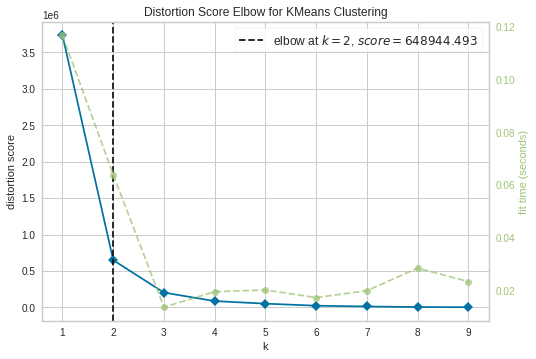

In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_labor[['2_사망만인율','3_천인율']])
visualizer.show() 

elbow method에서 k=2가 최적의 값이지만, Silhouette Analysis 결과 2와 3일때 평균 score가(빨간색) 비슷비슷해서 기존에 정했던 k=3으로 결정

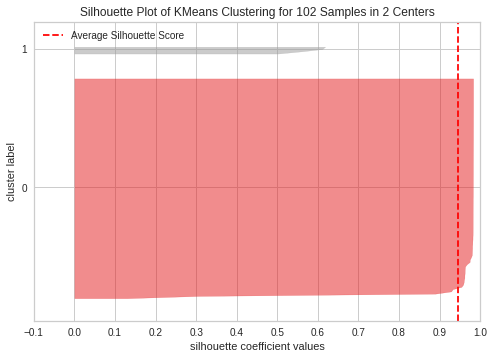

In [ ]:
model_4clust = KMeans(n_clusters = 2, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(df_labor[['2_사망만인율','3_천인율']])    
sil_visualizer.show()

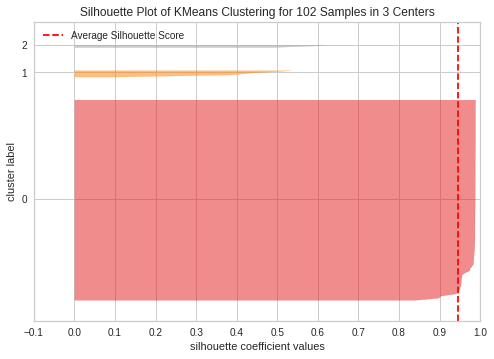

In [ ]:
model_4clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(df_labor[['2_사망만인율','3_천인율']])    
sil_visualizer.show()

k-means 실행

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_

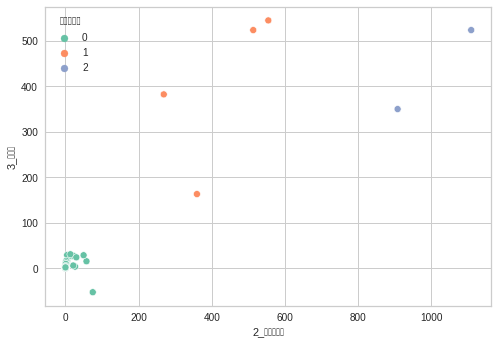

In [ ]:
# k-means clustering 실행
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(df_labor[['2_사망만인율','3_천인율']])

# 결과 확인
df_labor["근무안전성"] = kmeans.labels_
df_labor

sns.scatterplot(x='2_사망만인율', y='3_천인율', hue="근무안전성", data=df_labor, palette="Set2");

In [ ]:
df_labor['근무안전성'] = np.where(df_labor['근무안전성']==0,'상',
                     np.where(df_labor['근무안전성']==1, '중', '하'))
df_labor #근무안전성 지표 수정 완료

,업종,1_규모,월평균임금,2_질병사망자,2_사고사망자,2_사망만인율,3_사고재해자,3_질병재해자,3_천인율,규모,근무안전성
0,B.광업(05~08),1~4인,3805220.0,22.0,4.0,907.5800,24.0,121.0,349.590,A,하
1,B.광업(05~08),5~9인,3347485.0,15.0,0.0,359.4000,18.0,87.0,162.895,B,중
2,B.광업(05~08),10~29인,4360906.0,18.0,2.0,1108.5150,52.0,196.0,523.115,C,하
3,B.광업(05~08),30~99인,4761588.0,56.0,2.0,513.1650,24.0,434.0,523.070,D,중
4,B.광업(05~08),100~299인,4359364.0,70.0,1.0,554.3450,4.0,582.0,544.335,E,중
...,...,...,...,...,...,...,...,...,...,...,...
97,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",5~9인,2618072.0,2.0,1.0,0.9100,236.0,55.0,5.160,B,상
98,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",10~29인,3085493.0,4.0,1.0,0.4325,244.0,65.0,3.505,C,상
99,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",30~99인,3383215.0,1.0,0.0,0.2675,137.0,32.0,2.830,D,상
100,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",100~299인,4674394.0,4.0,1.0,0.3400,72.0,17.0,1.290,E,상


In [ ]:
df_labor_small = df_labor[['업종','규모','근무안전성']]

all_df = pd.merge(left=all_df, right=df_labor_small, how='left', \
                  on=['업종','규모'], sort=False)
all_df.head()

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,부채비율,총자본회전율,워라밸,자아실현,육아휴직,사내 육아 \n시설/서비스,사내 장애인\n시설/서비스,규모,월평균임금,근무안전성
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,96.5,0.7,3.0,3.0,1,0,0,D,4474436.0,상
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,205.5,0.5,2.0,2.0,0,0,0,C,2377333.0,상
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,81.8,1.9,2.0,2.3,1,0,1,C,3085493.0,상
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,61.1,0.6,3.0,2.0,1,0,0,C,3918241.0,상
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,51.0,0.6,2.8,2.7,0,0,0,C,4360906.0,하


## 4-2. 월평균임금액

1.동일업종 동일규모 대비 임금액 수준

In [ ]:
all_df['업종규모대비임금액']=all_df['임금(월)']/all_df['월평균임금']*100

2.동일업종 대비 임금액 수준

In [ ]:
df_labor_money=df_labor.groupby(['업종'])[['월평균임금']].mean().reset_index()
print(df_labor_money)
df_labor_money.rename(columns={'월평균임금':'업종별월평균임금'},inplace=True)

                                   업종         월평균임금
0                         B.광업(05~08)  4.374470e+06
1                        C.제조업(10~34)  3.846806e+06
2        D.전기, 가스, 증기 및 공기 조절 공급업(35)  5.235224e+06
3    E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)  4.011887e+06
4                        F.건설업(41~42)  3.637654e+06
5                   G.도매 및 소매업(45~47)  4.072904e+06
6                   H.운수 및 창고업(49~52)  3.626485e+06
7                  I.숙박 및 음식점업(55~56)  2.503812e+06
8                      J.정보통신업(58~63)  4.481081e+06
9                   K.금융 및 보험업(64~66)  6.124700e+06
10                         L.부동산업(68)  3.380775e+06
11          M.전문, 과학 및 기술 서비스업(70~73)  4.642276e+06
12  N.사업시설 관리, 사업 지원 및 임대 서비스업(74~76)  2.556472e+06
13                      P.교육 서비스업(85)  3.132389e+06
14           Q.보건업 및 사회복지 서비스업(86~87)  3.138489e+06
15       R.예술, 스포츠 및 여가관련 서비스업(90~91)  3.088125e+06
16  S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)  3.368536e+06


In [ ]:
#all_df에 적용
all_df = pd.merge(left=all_df, right=df_labor_money, how='left', \
                  on=['업종'], sort=False)
all_df['업종대비임금액']=all_df['임금(월)']/all_df['업종별월평균임금']*100
all_df.drop(['업종별월평균임금'],axis=1,inplace=True)

3.전체업종 대비 임금액 수준

In [ ]:
a=df_labor['월평균임금'].mean()
#all_df 적용
all_df['전체대비임금액']=all_df['임금(월)']/a*100 

100을 기준으로 '평균이하/평균이상' 분류

In [ ]:
all_df["업종규모대비임금액(상중하)"] = np.nan
all_df["업종대비임금액(상중하)"] = np.nan
all_df["전체대비임금액(상중하)"] = np.nan

all_df.loc[all_df['업종규모대비임금액'] >= 100, '업종규모대비임금액(상중하)'] = '평균이상'
all_df.loc[all_df['업종규모대비임금액'] < 100, '업종규모대비임금액(상중하)'] = '평균이하'

all_df.loc[all_df['업종대비임금액'] >= 100, '업종대비임금액(상중하)'] = '평균이상'
all_df.loc[all_df['업종대비임금액'] < 100, '업종대비임금액(상중하)'] = '평균이하'

all_df.loc[all_df['전체대비임금액'] >= 100, '전체대비임금액(상중하)'] = '평균이상'
all_df.loc[all_df['전체대비임금액'] < 100, '전체대비임금액(상중하)'] = '평균이하'

all_df

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,사내 장애인\n시설/서비스,규모,월평균임금,근무안전성,업종규모대비임금액,업종대비임금액,전체대비임금액,업종규모대비임금액(상중하),업종대비임금액(상중하),전체대비임금액(상중하)
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,0,D,4474436.0,상,56.712921,62.304022,66.141579,평균이하,평균이하,평균이하
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,0,C,2377333.0,상,105.159858,99.847772,65.161977,평균이상,평균이하,평균이하
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,1,C,3085493.0,상,81.024329,74.216217,65.161977,평균이하,평균이하,평균이하
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,0,C,3918241.0,상,63.804141,62.314815,65.161977,평균이하,평균이하,평균이하
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,0,C,4360906.0,하,57.327537,57.149783,65.161977,평균이하,평균이하,평균이하
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022-14240,사회적기업,(유)열린사회서비스센터,2248142129,백명화,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원 횡성군 횡성읍 어사매로 41,64.0,2500000.000,...,0,D,3041902.0,상,82.185422,79.656162,65.161977,평균이하,평균이하,평균이하
349,2022-10443,메인비즈기업,(유)성원엘리베이터,4028186315,"남미현,양해정","S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",산업용 기계 및 장비 수리업,전라북도 전주시 덕진구 신흥안길 52,28.0,2615000.000,...,1,C,3085493.0,상,84.751448,77.630163,68.159428,평균이하,평균이하,평균이하
350,2022-10796,메인비즈기업,(유)삼려환경,4178116112,장정근,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",전남 여수시 소라면 의곡길 115,20.0,3024166.667,...,1,C,3918241.0,상,77.181742,75.380154,78.824272,평균이하,평균이하,평균이하
351,2022-14248,사회적기업,(유)나눔,2268138000,권순란,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원도 강릉시 하평5길 9-0(포남동) 1층,63.0,2500000.000,...,0,D,3041902.0,상,82.185422,79.656162,65.161977,평균이하,평균이하,평균이하


## 4-3. 성장성

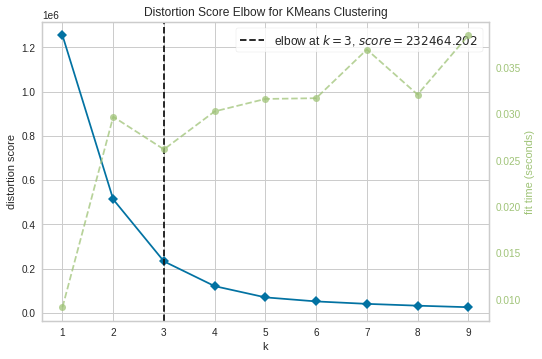

In [ ]:
# elbow method를 통한 최적의 k값 구하기

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(all_df[['순이익증가율']])
visualizer.show()

# elbow method에서 k=3가 최적의 값

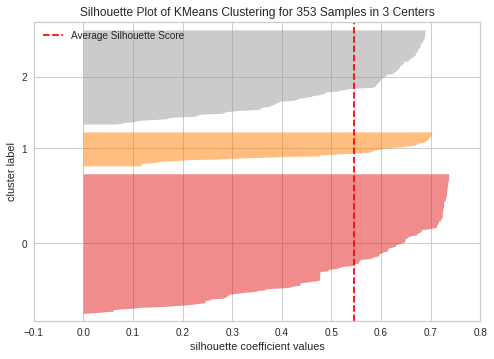

In [ ]:
model_4clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(all_df[['순이익증가율']])    
sil_visualizer.show()

In [ ]:
# k-means clustering 실행
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(all_df[['순이익증가율']])

# 결과 확인
all_df["성장성"] = kmeans.labels_
all_df

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,규모,월평균임금,근무안전성,업종규모대비임금액,업종대비임금액,전체대비임금액,업종규모대비임금액(상중하),업종대비임금액(상중하),전체대비임금액(상중하),성장성
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,D,4474436.0,상,56.712921,62.304022,66.141579,평균이하,평균이하,평균이하,2
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,C,2377333.0,상,105.159858,99.847772,65.161977,평균이상,평균이하,평균이하,2
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,C,3085493.0,상,81.024329,74.216217,65.161977,평균이하,평균이하,평균이하,0
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,C,3918241.0,상,63.804141,62.314815,65.161977,평균이하,평균이하,평균이하,1
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,C,4360906.0,하,57.327537,57.149783,65.161977,평균이하,평균이하,평균이하,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022-14240,사회적기업,(유)열린사회서비스센터,2248142129,백명화,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원 횡성군 횡성읍 어사매로 41,64.0,2500000.000,...,D,3041902.0,상,82.185422,79.656162,65.161977,평균이하,평균이하,평균이하,0
349,2022-10443,메인비즈기업,(유)성원엘리베이터,4028186315,"남미현,양해정","S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",산업용 기계 및 장비 수리업,전라북도 전주시 덕진구 신흥안길 52,28.0,2615000.000,...,C,3085493.0,상,84.751448,77.630163,68.159428,평균이하,평균이하,평균이하,0
350,2022-10796,메인비즈기업,(유)삼려환경,4178116112,장정근,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",전남 여수시 소라면 의곡길 115,20.0,3024166.667,...,C,3918241.0,상,77.181742,75.380154,78.824272,평균이하,평균이하,평균이하,2
351,2022-14248,사회적기업,(유)나눔,2268138000,권순란,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원도 강릉시 하평5길 9-0(포남동) 1층,63.0,2500000.000,...,D,3041902.0,상,82.185422,79.656162,65.161977,평균이하,평균이하,평균이하,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_

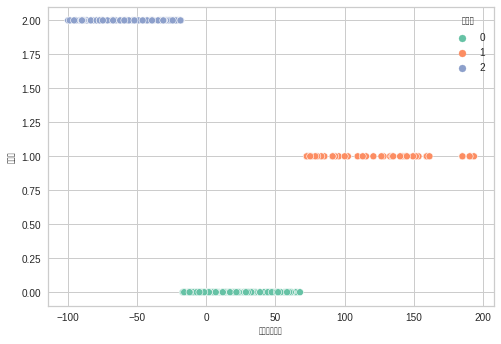

In [ ]:
sns.scatterplot(x='순이익증가율', y="성장성", hue="성장성", data=all_df, palette="Set2");

In [ ]:
all_df['성장성'] = all_df['성장성'].replace(2, "느슨한 성장")
all_df['성장성'] = all_df['성장성'].replace(1, "비약적 성장")
all_df['성장성'] = all_df['성장성'].replace(0, "점진적 성장")

all_df.head()

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,규모,월평균임금,근무안전성,업종규모대비임금액,업종대비임금액,전체대비임금액,업종규모대비임금액(상중하),업종대비임금액(상중하),전체대비임금액(상중하),성장성
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,D,4474436.0,상,56.712921,62.304022,66.141579,평균이하,평균이하,평균이하,느슨한 성장
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,C,2377333.0,상,105.159858,99.847772,65.161977,평균이상,평균이하,평균이하,느슨한 성장
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,C,3085493.0,상,81.024329,74.216217,65.161977,평균이하,평균이하,평균이하,점진적 성장
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,C,3918241.0,상,63.804141,62.314815,65.161977,평균이하,평균이하,평균이하,비약적 성장
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,C,4360906.0,하,57.327537,57.149783,65.161977,평균이하,평균이하,평균이하,느슨한 성장


## 4-4. 수익성

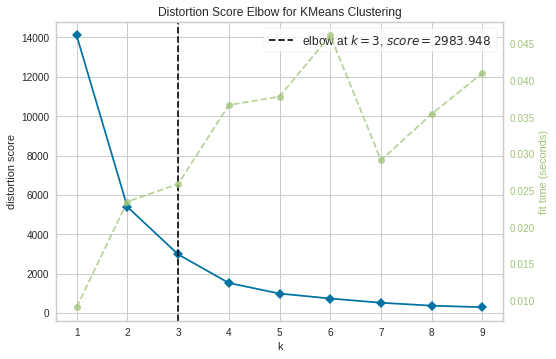

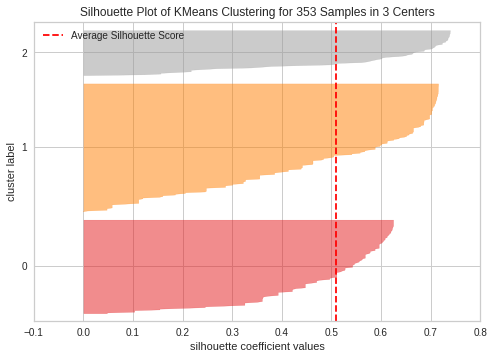

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,월평균임금,근무안전성,업종규모대비임금액,업종대비임금액,전체대비임금액,업종규모대비임금액(상중하),업종대비임금액(상중하),전체대비임금액(상중하),성장성,수익성
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,4474436.0,상,56.712921,62.304022,66.141579,평균이하,평균이하,평균이하,느슨한 성장,1
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,2377333.0,상,105.159858,99.847772,65.161977,평균이상,평균이하,평균이하,느슨한 성장,0
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,3085493.0,상,81.024329,74.216217,65.161977,평균이하,평균이하,평균이하,점진적 성장,1
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,3918241.0,상,63.804141,62.314815,65.161977,평균이하,평균이하,평균이하,비약적 성장,1
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,4360906.0,하,57.327537,57.149783,65.161977,평균이하,평균이하,평균이하,느슨한 성장,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022-14240,사회적기업,(유)열린사회서비스센터,2248142129,백명화,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원 횡성군 횡성읍 어사매로 41,64.0,2500000.000,...,3041902.0,상,82.185422,79.656162,65.161977,평균이하,평균이하,평균이하,점진적 성장,2
349,2022-10443,메인비즈기업,(유)성원엘리베이터,4028186315,"남미현,양해정","S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",산업용 기계 및 장비 수리업,전라북도 전주시 덕진구 신흥안길 52,28.0,2615000.000,...,3085493.0,상,84.751448,77.630163,68.159428,평균이하,평균이하,평균이하,점진적 성장,1
350,2022-10796,메인비즈기업,(유)삼려환경,4178116112,장정근,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",전남 여수시 소라면 의곡길 115,20.0,3024166.667,...,3918241.0,상,77.181742,75.380154,78.824272,평균이하,평균이하,평균이하,느슨한 성장,1
351,2022-14248,사회적기업,(유)나눔,2268138000,권순란,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원도 강릉시 하평5길 9-0(포남동) 1층,63.0,2500000.000,...,3041902.0,상,82.185422,79.656162,65.161977,평균이하,평균이하,평균이하,점진적 성장,1


In [ ]:
# elbow method를 통한 최적의 k값 구하기

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(all_df[['총자산순이익율']])
visualizer.show()

# elbow method에서 k=3가 최적의 값

model_4clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(all_df[['총자산순이익율']])    
sil_visualizer.show()

# k-means 실행
# k-means clustering 실행
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(all_df[['총자산순이익율']])

# 결과 확인
all_df["수익성"] = kmeans.labels_
all_df

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_

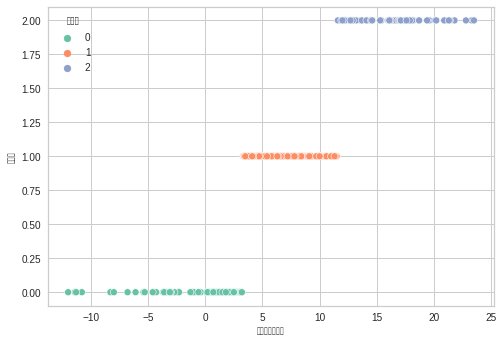

In [ ]:
sns.scatterplot(x='총자산순이익율', y="수익성", hue="수익성", data=all_df, palette="Set2");

In [ ]:
all_df['수익성'] = all_df['수익성'].replace(0, "저수익")
all_df['수익성'] = all_df['수익성'].replace(1, "중수익")
all_df['수익성'] = all_df['수익성'].replace(2, "고수익")

## 4-5. 안정성

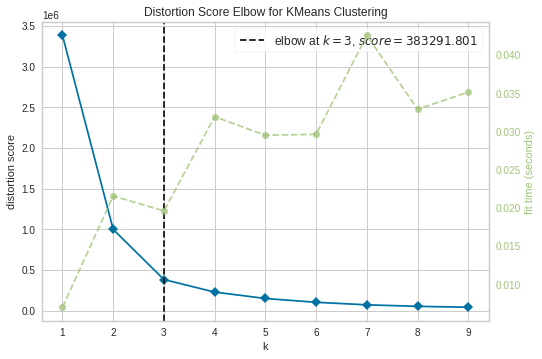

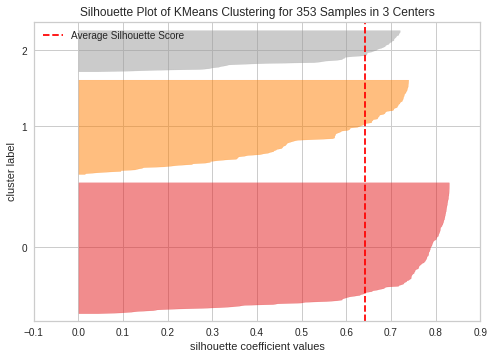

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,근무안전성,업종규모대비임금액,업종대비임금액,전체대비임금액,업종규모대비임금액(상중하),업종대비임금액(상중하),전체대비임금액(상중하),성장성,수익성,안정성
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,상,56.712921,62.304022,66.141579,평균이하,평균이하,평균이하,느슨한 성장,중수익,1
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,상,105.159858,99.847772,65.161977,평균이상,평균이하,평균이하,느슨한 성장,저수익,1
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,상,81.024329,74.216217,65.161977,평균이하,평균이하,평균이하,점진적 성장,중수익,0
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,상,63.804141,62.314815,65.161977,평균이하,평균이하,평균이하,비약적 성장,중수익,0
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,하,57.327537,57.149783,65.161977,평균이하,평균이하,평균이하,느슨한 성장,중수익,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022-14240,사회적기업,(유)열린사회서비스센터,2248142129,백명화,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원 횡성군 횡성읍 어사매로 41,64.0,2500000.000,...,상,82.185422,79.656162,65.161977,평균이하,평균이하,평균이하,점진적 성장,고수익,1
349,2022-10443,메인비즈기업,(유)성원엘리베이터,4028186315,"남미현,양해정","S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",산업용 기계 및 장비 수리업,전라북도 전주시 덕진구 신흥안길 52,28.0,2615000.000,...,상,84.751448,77.630163,68.159428,평균이하,평균이하,평균이하,점진적 성장,중수익,0
350,2022-10796,메인비즈기업,(유)삼려환경,4178116112,장정근,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",전남 여수시 소라면 의곡길 115,20.0,3024166.667,...,상,77.181742,75.380154,78.824272,평균이하,평균이하,평균이하,느슨한 성장,중수익,0
351,2022-14248,사회적기업,(유)나눔,2268138000,권순란,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원도 강릉시 하평5길 9-0(포남동) 1층,63.0,2500000.000,...,상,82.185422,79.656162,65.161977,평균이하,평균이하,평균이하,점진적 성장,중수익,0


In [ ]:
# elbow method를 통한 최적의 k값 구하기

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(all_df[['부채비율']])
visualizer.show()

# elbow method에서 k=3가 최적의 값

model_4clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(all_df[['부채비율']])    
sil_visualizer.show()

# k-means 실행
# k-means clustering 실행
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(all_df[['부채비율']])

# 결과 확인
all_df["안정성"] = kmeans.labels_
all_df

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_te

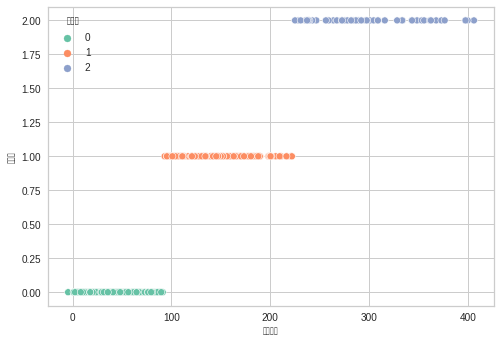

In [ ]:
sns.scatterplot(x='부채비율', y="안정성", hue="안정성", data=all_df, palette="Set2");

In [ ]:
all_df['안정성'] = all_df['안정성'].replace(1, "보통")
all_df['안정성'] = all_df['안정성'].replace(0, "높음")
all_df['안정성'] = all_df['안정성'].replace(2, "낮음")

## 4-6. 활동성

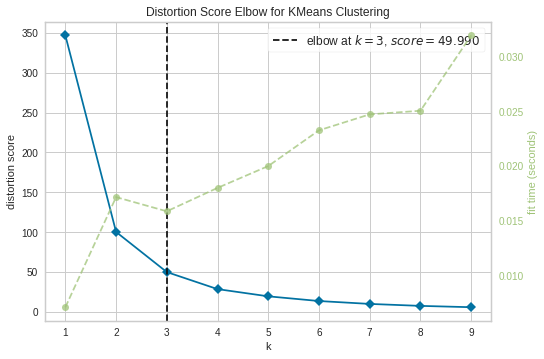

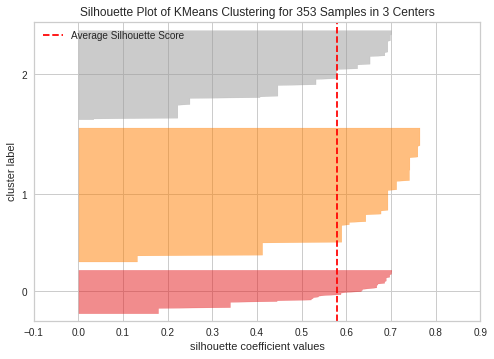

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,업종규모대비임금액,업종대비임금액,전체대비임금액,업종규모대비임금액(상중하),업종대비임금액(상중하),전체대비임금액(상중하),성장성,수익성,안정성,활동성
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,56.712921,62.304022,66.141579,평균이하,평균이하,평균이하,느슨한 성장,중수익,보통,1
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,105.159858,99.847772,65.161977,평균이상,평균이하,평균이하,느슨한 성장,저수익,보통,1
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,81.024329,74.216217,65.161977,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,2
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,63.804141,62.314815,65.161977,평균이하,평균이하,평균이하,비약적 성장,중수익,높음,1
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,57.327537,57.149783,65.161977,평균이하,평균이하,평균이하,느슨한 성장,중수익,높음,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022-14240,사회적기업,(유)열린사회서비스센터,2248142129,백명화,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원 횡성군 횡성읍 어사매로 41,64.0,2500000.000,...,82.185422,79.656162,65.161977,평균이하,평균이하,평균이하,점진적 성장,고수익,보통,0
349,2022-10443,메인비즈기업,(유)성원엘리베이터,4028186315,"남미현,양해정","S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",산업용 기계 및 장비 수리업,전라북도 전주시 덕진구 신흥안길 52,28.0,2615000.000,...,84.751448,77.630163,68.159428,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,2
350,2022-10796,메인비즈기업,(유)삼려환경,4178116112,장정근,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",전남 여수시 소라면 의곡길 115,20.0,3024166.667,...,77.181742,75.380154,78.824272,평균이하,평균이하,평균이하,느슨한 성장,중수익,높음,1
351,2022-14248,사회적기업,(유)나눔,2268138000,권순란,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원도 강릉시 하평5길 9-0(포남동) 1층,63.0,2500000.000,...,82.185422,79.656162,65.161977,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,0


In [ ]:
# elbow method를 통한 최적의 k값 구하기

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(all_df[['총자본회전율']])
visualizer.show()

# elbow method에서 k=3가 최적의 값

model_4clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(all_df[['총자본회전율']])    
sil_visualizer.show()

# k-means 실행
# k-means clustering 실행
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(all_df[['총자본회전율']])

# 결과 확인
all_df["활동성"] = kmeans.labels_
all_df

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_

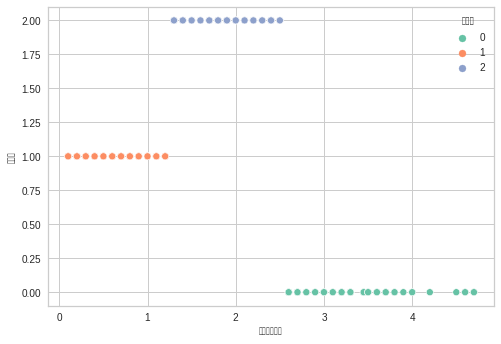

In [ ]:
sns.scatterplot(x='총자본회전율', y="활동성", hue="활동성", data=all_df, palette="Set2");

In [ ]:
# 0,1,2=> 각각 저효율, 고효율, 중효율
all_df['활동성'] = all_df['활동성'].replace(2, "중효율")
all_df['활동성'] = all_df['활동성'].replace(0, "고효율")
all_df['활동성'] = all_df['활동성'].replace(1, "저효율")

## 4-7. 수평적 조직문화

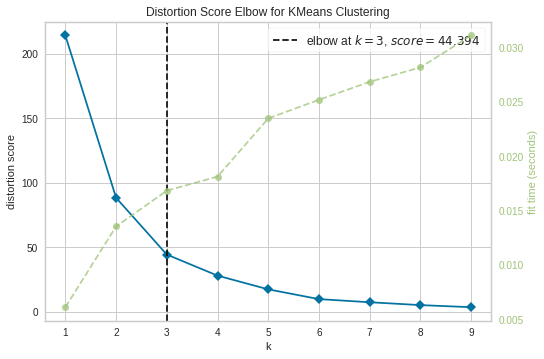

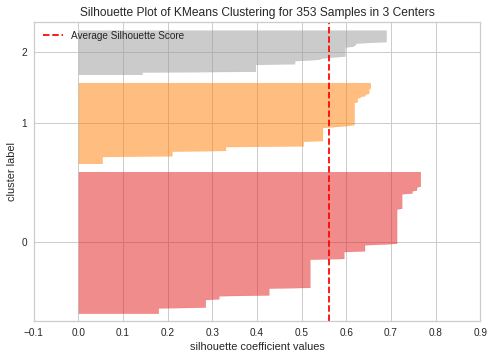

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,업종대비임금액,전체대비임금액,업종규모대비임금액(상중하),업종대비임금액(상중하),전체대비임금액(상중하),성장성,수익성,안정성,활동성,수평적_조직문화(상중하)
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,62.304022,66.141579,평균이하,평균이하,평균이하,느슨한 성장,중수익,보통,저효율,0
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,99.847772,65.161977,평균이상,평균이하,평균이하,느슨한 성장,저수익,보통,저효율,0
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,74.216217,65.161977,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,중효율,1
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,62.314815,65.161977,평균이하,평균이하,평균이하,비약적 성장,중수익,높음,저효율,0
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,57.149783,65.161977,평균이하,평균이하,평균이하,느슨한 성장,중수익,높음,저효율,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022-14240,사회적기업,(유)열린사회서비스센터,2248142129,백명화,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원 횡성군 횡성읍 어사매로 41,64.0,2500000.000,...,79.656162,65.161977,평균이하,평균이하,평균이하,점진적 성장,고수익,보통,고효율,0
349,2022-10443,메인비즈기업,(유)성원엘리베이터,4028186315,"남미현,양해정","S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",산업용 기계 및 장비 수리업,전라북도 전주시 덕진구 신흥안길 52,28.0,2615000.000,...,77.630163,68.159428,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,중효율,1
350,2022-10796,메인비즈기업,(유)삼려환경,4178116112,장정근,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",전남 여수시 소라면 의곡길 115,20.0,3024166.667,...,75.380154,78.824272,평균이하,평균이하,평균이하,느슨한 성장,중수익,높음,저효율,0
351,2022-14248,사회적기업,(유)나눔,2268138000,권순란,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원도 강릉시 하평5길 9-0(포남동) 1층,63.0,2500000.000,...,79.656162,65.161977,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,고효율,0


In [ ]:
# elbow method를 통한 최적의 k값 구하기

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(all_df[['수평적_조직문화']])
visualizer.show()

# elbow method에서 k=3가 최적의 값

model_4clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(all_df[['수평적_조직문화']])    
sil_visualizer.show()

# k-means 실행
# k-means clustering 실행
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(all_df[['수평적_조직문화']])

# 결과 확인
all_df["수평적_조직문화(상중하)"] = kmeans.labels_
all_df

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_

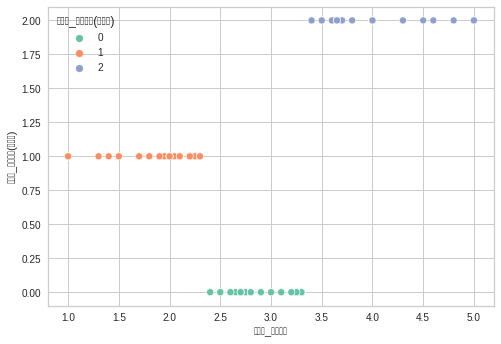

In [ ]:
sns.scatterplot(x='수평적_조직문화', y="수평적_조직문화(상중하)", hue="수평적_조직문화(상중하)", data=all_df, palette="Set2");

In [ ]:
# 0,1,2=> 각각 중, 하, 상
all_df['수평적_조직문화(상중하)'] = all_df['수평적_조직문화(상중하)'].replace(0, "중")
all_df['수평적_조직문화(상중하)'] = all_df['수평적_조직문화(상중하)'].replace(1, "하")
all_df['수평적_조직문화(상중하)'] = all_df['수평적_조직문화(상중하)'].replace(2, "상")

## 4-8. 워라밸

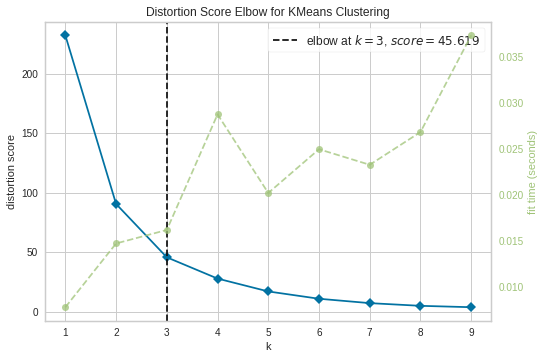

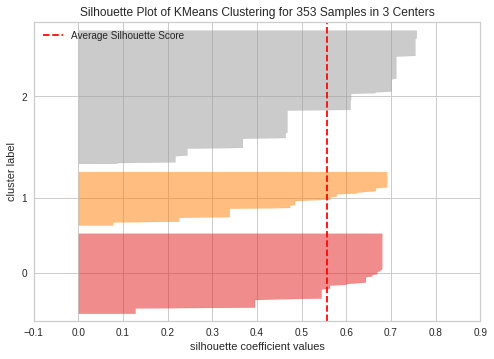

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,전체대비임금액,업종규모대비임금액(상중하),업종대비임금액(상중하),전체대비임금액(상중하),성장성,수익성,안정성,활동성,수평적_조직문화(상중하),워라밸(상중하)
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,66.141579,평균이하,평균이하,평균이하,느슨한 성장,중수익,보통,저효율,중,2
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,65.161977,평균이상,평균이하,평균이하,느슨한 성장,저수익,보통,저효율,중,0
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,65.161977,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,중효율,하,0
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,65.161977,평균이하,평균이하,평균이하,비약적 성장,중수익,높음,저효율,중,2
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,65.161977,평균이하,평균이하,평균이하,느슨한 성장,중수익,높음,저효율,중,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022-14240,사회적기업,(유)열린사회서비스센터,2248142129,백명화,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원 횡성군 횡성읍 어사매로 41,64.0,2500000.000,...,65.161977,평균이하,평균이하,평균이하,점진적 성장,고수익,보통,고효율,중,2
349,2022-10443,메인비즈기업,(유)성원엘리베이터,4028186315,"남미현,양해정","S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",산업용 기계 및 장비 수리업,전라북도 전주시 덕진구 신흥안길 52,28.0,2615000.000,...,68.159428,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,중효율,하,0
350,2022-10796,메인비즈기업,(유)삼려환경,4178116112,장정근,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",전남 여수시 소라면 의곡길 115,20.0,3024166.667,...,78.824272,평균이하,평균이하,평균이하,느슨한 성장,중수익,높음,저효율,중,0
351,2022-14248,사회적기업,(유)나눔,2268138000,권순란,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원도 강릉시 하평5길 9-0(포남동) 1층,63.0,2500000.000,...,65.161977,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,고효율,중,2


In [ ]:
# elbow method를 통한 최적의 k값 구하기

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(all_df[['워라밸']])
visualizer.show()

# elbow method에서 k=3가 최적의 값

model_4clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(all_df[['워라밸']])    
sil_visualizer.show()

# k-means 실행
# k-means clustering 실행
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(all_df[['워라밸']])

# 결과 확인
all_df["워라밸(상중하)"] = kmeans.labels_
all_df

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48184 missing from current font.
  font.set_text

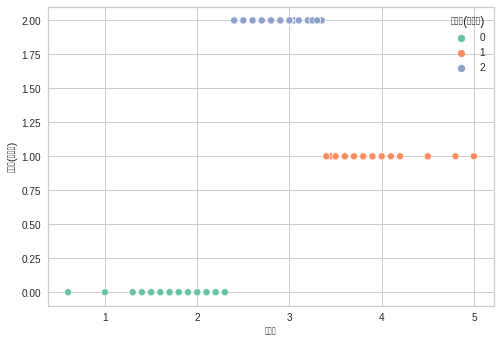

In [ ]:
sns.scatterplot(x='워라밸', y="워라밸(상중하)", hue="워라밸(상중하)", data=all_df, palette="Set2");

In [ ]:
# 0,1,2=> 각각 상, 하, 중
all_df['워라밸(상중하)'] = all_df['워라밸(상중하)'].replace(2, "중")
all_df['워라밸(상중하)'] = all_df['워라밸(상중하)'].replace(1, "상")
all_df['워라밸(상중하)'] = all_df['워라밸(상중하)'].replace(0, "하")

## 4-9. 자아실현

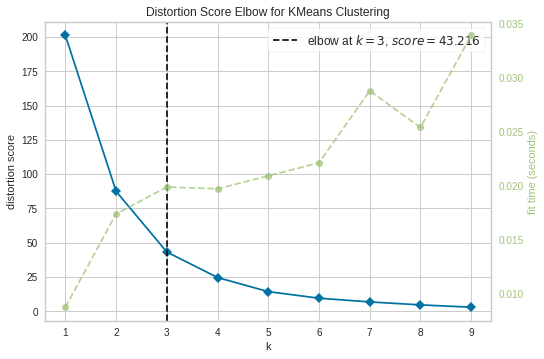

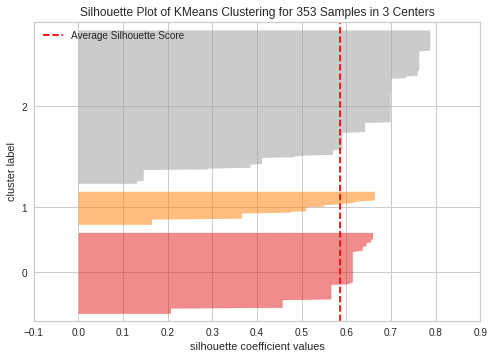

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,업종규모대비임금액(상중하),업종대비임금액(상중하),전체대비임금액(상중하),성장성,수익성,안정성,활동성,수평적_조직문화(상중하),워라밸(상중하),자아실현(상중하)
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,평균이하,평균이하,평균이하,느슨한 성장,중수익,보통,저효율,중,중,2
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,평균이상,평균이하,평균이하,느슨한 성장,저수익,보통,저효율,중,하,0
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,중효율,하,하,2
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,평균이하,평균이하,평균이하,비약적 성장,중수익,높음,저효율,중,중,0
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,평균이하,평균이하,평균이하,느슨한 성장,중수익,높음,저효율,중,중,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022-14240,사회적기업,(유)열린사회서비스센터,2248142129,백명화,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원 횡성군 횡성읍 어사매로 41,64.0,2500000.000,...,평균이하,평균이하,평균이하,점진적 성장,고수익,보통,고효율,중,중,2
349,2022-10443,메인비즈기업,(유)성원엘리베이터,4028186315,"남미현,양해정","S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",산업용 기계 및 장비 수리업,전라북도 전주시 덕진구 신흥안길 52,28.0,2615000.000,...,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,중효율,하,하,0
350,2022-10796,메인비즈기업,(유)삼려환경,4178116112,장정근,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",전남 여수시 소라면 의곡길 115,20.0,3024166.667,...,평균이하,평균이하,평균이하,느슨한 성장,중수익,높음,저효율,중,하,0
351,2022-14248,사회적기업,(유)나눔,2268138000,권순란,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원도 강릉시 하평5길 9-0(포남동) 1층,63.0,2500000.000,...,평균이하,평균이하,평균이하,점진적 성장,중수익,높음,고효율,중,중,2


In [ ]:
# elbow method를 통한 최적의 k값 구하기

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(all_df[['자아실현']])
visualizer.show()

# elbow method에서 k=3가 최적의 값

model_4clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(all_df[['자아실현']])    
sil_visualizer.show()

# k-means 실행
# k-means clustering 실행
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(all_df[['자아실현']])

# 결과 확인
all_df["자아실현(상중하)"] = kmeans.labels_
all_df

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_te

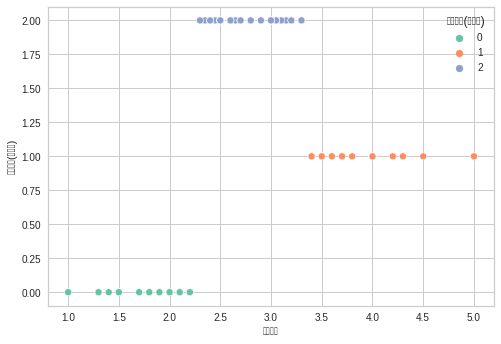

In [ ]:
sns.scatterplot(x='자아실현', y="자아실현(상중하)", hue="자아실현(상중하)", data=all_df, palette="Set2");

In [ ]:
all_df['자아실현(상중하)'] = all_df['자아실현(상중하)'].replace(2, "중")
all_df['자아실현(상중하)'] = all_df['자아실현(상중하)'].replace(1, "상")
all_df['자아실현(상중하)'] = all_df['자아실현(상중하)'].replace(0, "하")

## 5. 제무제표 4개 지표를 통합해서 평가

In [ ]:
all_df_finance=all_df[['순이익증가율','총자산순이익율','부채비율','총자본회전율']]

all_df_finance['부채비율']=-all_df_finance['부채비율']

#Scaling 진행

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all_df_finance_std = pd.DataFrame(scaler.fit_transform(all_df_finance), columns=all_df_finance.columns, index=all_df_finance.index) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.36044866, 0.26069268, 0.21780021, 0.16105846])

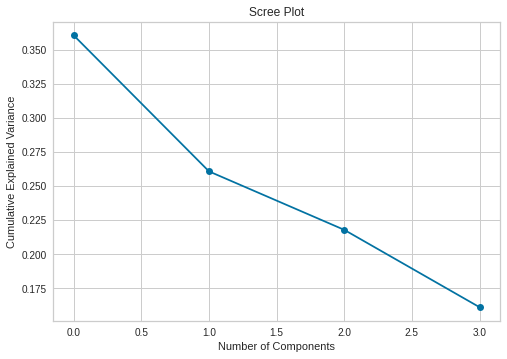

In [ ]:
#pca 후 scree plot 확인

from sklearn.decomposition import PCA
pca= PCA(n_components=4,random_state=42)
pca_fit=pca.fit(all_df_finance_std)

#scree plot
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_,'o-')
pca.explained_variance_ratio_   #3개의 component로 전체 분산 중 약 79%설명
#그러나 k-means 시각화의 어려움(62%정도를 차지하는 2개의 component 사용)

In [ ]:
#PCA score 구하기

scores=pca.transform(all_df_finance_std)
scores_df=pd.DataFrame(scores, columns=['PC1','PC2','PC3','PC4']) 
scores_df


,PC1,PC2,PC3,PC4
0,-0.803287,-0.614725,-0.195935,-0.041379
1,-1.766730,-0.094587,0.362504,-0.827525
2,0.273124,-0.065035,0.187467,0.460871
3,0.564799,-0.534547,-1.411065,-0.093546
4,-1.089177,-1.367358,0.456562,-0.165153
...,...,...,...,...
348,2.896825,0.408776,0.376111,-1.231563
349,1.305468,0.087578,0.361623,0.035907
350,-0.307610,-1.414349,0.034107,-0.380229
351,1.707289,0.614776,0.901890,1.613247


In [ ]:
scores_df.drop(['PC3','PC4'],axis=1,inplace=True)

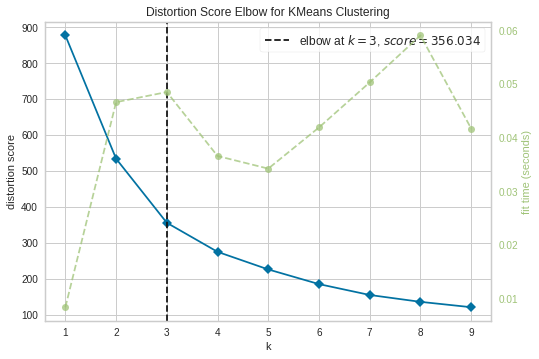

In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scores_df)
visualizer.show() 
#k=3 최적

In [ ]:
# k-means clustering 실행
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(scores_df)

# 결과 확인
all_df["기업종합평가지수"] = kmeans.labels_
all_df

,연번,브랜드명,사업장명,사업자등록번호,대표자명,업종,업종(소분류),주소,직원수,임금(월),...,업종대비임금액(상중하),전체대비임금액(상중하),성장성,수익성,안정성,활동성,수평적_조직문화(상중하),워라밸(상중하),자아실현(상중하),기업종합평가지수
0,2022-00201,신청기업,효성청과주식회사,5048113350,김형수,G.도매 및 소매업(45~47),상품 중개업,대구 북구 매천로18길 34(매천동),37.0,2537583.333,...,평균이하,평균이하,느슨한 성장,중수익,보통,저효율,중,중,중,2
1,2022-12136,메인비즈기업,황남빵,5050394362,최상은,I.숙박 및 음식점업(55~56),음식점업,경상북도 경주시 태종로 783,27.0,2500000.000,...,평균이하,평균이하,느슨한 성장,저수익,보통,저효율,중,하,하,2
2,2022-05639,이노비즈기업,현빈개발(주),2148723087,권재훈,"S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",개인 및 가정용품 수리업,"서울 서초구 논현로 79710호 (양재동, 윈드스톤호피스텔빌딩)",21.0,2500000.000,...,평균이하,평균이하,점진적 성장,중수익,높음,중효율,하,하,중,2
3,2022-11022,메인비즈기업,합자회사 보령환경,3138101700,"문영숙,최대윤","E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",충남 보령시 신설3길 26-3(동대동),29.0,2500000.000,...,평균이하,평균이하,비약적 성장,중수익,높음,저효율,중,중,하,2
4,2022-13390,메인비즈기업,합자회사 건우개발,5118112266,신윤교,B.광업(05~08),토사석 광업,경북 문경시 산북면 운달로 388건우개발,17.0,2500000.000,...,평균이하,평균이하,느슨한 성장,중수익,높음,저효율,중,중,중,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022-14240,사회적기업,(유)열린사회서비스센터,2248142129,백명화,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원 횡성군 횡성읍 어사매로 41,64.0,2500000.000,...,평균이하,평균이하,점진적 성장,고수익,보통,고효율,중,중,중,0
349,2022-10443,메인비즈기업,(유)성원엘리베이터,4028186315,"남미현,양해정","S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",산업용 기계 및 장비 수리업,전라북도 전주시 덕진구 신흥안길 52,28.0,2615000.000,...,평균이하,평균이하,점진적 성장,중수익,높음,중효율,하,하,하,0
350,2022-10796,메인비즈기업,(유)삼려환경,4178116112,장정근,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업",전남 여수시 소라면 의곡길 115,20.0,3024166.667,...,평균이하,평균이하,느슨한 성장,중수익,높음,저효율,중,하,하,2
351,2022-14248,사회적기업,(유)나눔,2268138000,권순란,Q.보건업 및 사회복지 서비스업(86~87),비거주 복지시설 운영업,강원도 강릉시 하평5길 9-0(포남동) 1층,63.0,2500000.000,...,평균이하,평균이하,점진적 성장,중수익,높음,고효율,중,중,중,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_

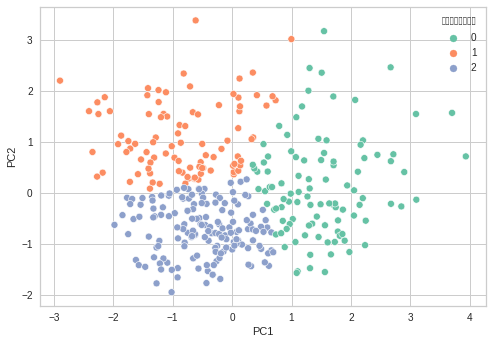

In [ ]:
scores_df['기업종합평가지수'] = all_df['기업종합평가지수']
sns.scatterplot(x='PC1', y='PC2', hue="기업종합평가지수", data=scores_df, palette="Set2");

#그래프 해석: PC1과 PC2가 모두 높은 값을 가지고 있는 1이 우수

#PC1과 PC2가 0 주변을 배회하는 0이 양호

#PC2은 값이 크지만 PC1이 값이 작은 기업들은 4가지 지표의 편차가 많이 난다고 해석하여 보통으로 라벨링

In [ ]:
#0,1,2=> 각각 양호,우수,보통
all_df["기업종합평가지수"] = all_df["기업종합평가지수"].replace(0, "우수")
all_df["기업종합평가지수"] = all_df["기업종합평가지수"].replace(2, "보통")
all_df["기업종합평가지수"] = all_df["기업종합평가지수"].replace(1, "양호")

In [ ]:
all_df.columns

Index(['연번', '브랜드명', '사업장명', '사업자등록번호', '대표자명', '업종', '업종(소분류)', '주소', '직원수',
       '임금(월)', '소재지', '수평적_조직문화', '순이익증가율', '총자산순이익율', '부채비율', '총자본회전율',
       '워라밸', '자아실현', '육아휴직', '사내 육아 \n시설/서비스', '사내 장애인\n시설/서비스', '규모',
       '월평균임금', '근무안전성', '업종규모대비임금액', '업종대비임금액', '전체대비임금액', '업종규모대비임금액(상중하)',
       '업종대비임금액(상중하)', '전체대비임금액(상중하)', '성장성', '수익성', '안정성', '활동성',
       '수평적_조직문화(상중하)', '워라밸(상중하)', '자아실현(상중하)', '기업종합평가지수'],
      dtype='object')

## 전체지표를 종합한 점수를 예측

In [ ]:
# all_df에서 필요한 변수만 가져오기
all_df_select=all_df[['업종규모대비임금액','업종대비임금액','전체대비임금액','근무안전성','성장성','수익성','안정성','활동성','수평적_조직문화(상중하)','워라밸(상중하)','자아실현(상중하)','기업종합평가지수']]

#2개분류:'업종규모대비임금액','업종대비임금액','전체대비임금액' 50/50
#3개분류:'근무안전성','수익성','활동성','안정성','활용성','수평적_수직문화','워라밸','자아실현','기업종합평가지수 33/33/33

값 바꾸기

In [ ]:
#업종규모대비임금액
all_df_select["업종규모대비임금액"] = all_df_select["업종규모대비임금액"].replace("평균이하", 30)
all_df_select["업종규모대비임금액"] = all_df_select["업종규모대비임금액"].replace("평균이상", 70)

#업종대비임금액
all_df_select["업종대비임금액"] = all_df_select["업종대비임금액"].replace("평균이하", 30)
all_df_select["업종대비임금액"] = all_df_select["업종대비임금액"].replace("평균이상", 70)

#전체대비임금액
all_df_select["전체대비임금액"] = all_df_select["전체대비임금액"].replace("평균이하", 30)
all_df_select["전체대비임금액"] = all_df_select["전체대비임금액"].replace("평균이상", 70)


##여기부터 3개 분류

#근무안전성
all_df_select["근무안전성"] = all_df_select["근무안전성"].replace("상", 53)
all_df_select["근무안전성"] = all_df_select["근무안전성"].replace("중", 33)
all_df_select["근무안전성"] = all_df_select["근무안전성"].replace("하", 13)

#성장성
all_df_select["성장성"] = all_df_select["성장성"].replace("비약적 성장", 53)
all_df_select["성장성"] = all_df_select["성장성"].replace("점진적 성장", 33)
all_df_select["성장성"] = all_df_select["성장성"].replace("느슨한 성장", 13)

#수익성
all_df_select["수익성"] = all_df_select["수익성"].replace("고수익", 53)
all_df_select["수익성"] = all_df_select["수익성"].replace("중수익", 33)
all_df_select["수익성"] = all_df_select["수익성"].replace("저수익", 13)

#안정성
all_df_select["안정성"] = all_df_select["안정성"].replace("높음", 53)
all_df_select["안정성"] = all_df_select["안정성"].replace("보통", 33)
all_df_select["안정성"] = all_df_select["안정성"].replace("낮음", 13)

#활동성
all_df_select["활동성"] = all_df_select["활동성"].replace("고효율", 53)
all_df_select["활동성"] = all_df_select["활동성"].replace("중효율", 33)
all_df_select["활동성"] = all_df_select["활동성"].replace("저효율", 13)

#수평적_조직문화(상중하)
all_df_select["수평적_조직문화(상중하)"] = all_df_select["수평적_조직문화(상중하)"].replace("상", 53)
all_df_select["수평적_조직문화(상중하)"] = all_df_select["수평적_조직문화(상중하)"].replace("중", 33)
all_df_select["수평적_조직문화(상중하)"] = all_df_select["수평적_조직문화(상중하)"].replace("하", 13)

#워라밸
all_df_select["워라밸(상중하)"] = all_df_select["워라밸(상중하)"].replace("상", 53)
all_df_select["워라밸(상중하)"] = all_df_select["워라밸(상중하)"].replace("중", 33)
all_df_select["워라밸(상중하)"] = all_df_select["워라밸(상중하)"].replace("하", 13)

#자아실현
all_df_select["자아실현(상중하)"] = all_df_select["자아실현(상중하)"].replace("상", 53)
all_df_select["자아실현(상중하)"] = all_df_select["자아실현(상중하)"].replace("중", 33)
all_df_select["자아실현(상중하)"] = all_df_select["자아실현(상중하)"].replace("하", 13)

#기업종합평가지수
all_df_select["기업종합평가지수"] = all_df_select["기업종합평가지수"].replace("우수", 53)
all_df_select["기업종합평가지수"] = all_df_select["기업종합평가지수"].replace("양호", 33)
all_df_select["기업종합평가지수"] = all_df_select["기업종합평가지수"].replace("보통", 13)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#'업종규모대비임금액','업종대비임금액','전체대비임금액','근무안전성','성장성','수익성','안정성','활동성','수평적_조직문화(상중하)','워라밸(상중하)','자아실현(상중하)','기업종합평가지수'
all_df_select['종합점수']=(all_df_select['업종규모대비임금액']+all_df_select['업종대비임금액']+all_df_select['전체대비임금액']+all_df_select['근무안전성']+all_df_select['성장성']+all_df_select['수익성']+all_df_select['안정성']+all_df_select['활동성']+all_df_select['수평적_조직문화(상중하)']+all_df_select['워라밸(상중하)']+all_df_select['자아실현(상중하)']+all_df_select['기업종합평가지수'])/12

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
all_df_select['종합점수']

0      36.846543
1      38.930801
2      41.450210
3      40.690078
4      34.719941
         ...    
348    50.333630
349    43.961753
350    39.032181
351    50.333630
352    37.874170
Name: 종합점수, Length: 353, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_te

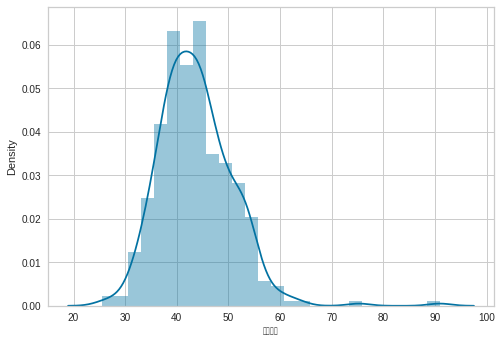

In [ ]:
#분포확인
sns.distplot(all_df_select['종합점수'])  #대략 normal 분포를 띈다.

In [ ]:
all_df["종합점수"] = np.nan
all_df["종합점수"]=all_df_select['종합점수'].copy()

#8. 모델링

업종과 규모도 추가하기/LGBM사용/Stratified k-fold/accuracy

accuracy 안되면 f1 사용하기

1.근무안전성((태영): 업종 규모 사망만인률, 천인률

2-1 동일업종 동일규모 대비 임금액 수준: 업종 규모 업종규모대비임금액

2-2 동일업종 대비 임금액 수준:업종 규모 업종대비임금액

2-3 전체업종 대비 임금액 수준:업종 규모 전체대비임금액

3-1 성장성:업종 규모 순이익증가율

3-2 수익성:업종 규모 총자산순이익율

3-3 안정성:업종 규모 부채비율

3-4 활동성:업종 규모 총자산회전율

4 수평적 조직문화:업종 규모 수평적 조직문화

5 워라밸:업종 규모 워라밸

6 자아실현:업종 규모 자아실현

7 기업종합평가지수(태영):업종 규모 4개 지표

8 종합점수(태영):업종 규모 종합점수_제외한_나머지_변수_전부

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

#각 클래스별 몇개씩 있나 확인

##value_counts()

#각 변수별 자료형 확인

##test.info()



#one-hot-encoding

##all_data_final=pd.get_dummies(all_data)

#8-3-1 성장성 예측

In [ ]:
all_df.columns

Index(['연번', '브랜드명', '사업장명', '사업자등록번호', '대표자명', '업종', '업종(소분류)', '주소', '직원수',
       '임금(월)', '소재지', '수평적_조직문화', '순이익증가율', '총자산순이익율', '부채비율', '총자본회전율',
       '워라밸', '자아실현', '육아휴직', '사내 육아 \n시설/서비스', '사내 장애인\n시설/서비스', '규모',
       '월평균임금', '근무안전성', '업종규모대비임금액', '업종대비임금액', '전체대비임금액', '업종규모대비임금액(상중하)',
       '업종대비임금액(상중하)', '전체대비임금액(상중하)', '성장성', '수익성', '안정성', '활동성',
       '수평적_조직문화(상중하)', '워라밸(상중하)', '자아실현(상중하)', '기업종합평가지수', '종합점수'],
      dtype='object')

In [ ]:
all_df_831=all_df[['업종','규모','순이익증가율']]
all_df_831=pd.get_dummies(all_df_831) 
all_df_831=pd.concat([all_df_831,all_df['성장성']], axis=1)

In [ ]:
# Train Data and Test Data -> Data의 개수가 적으므로 9:1의 비율로 생성
from sklearn.model_selection import train_test_split
df_train_831, df_test_831 = train_test_split(all_df_831, test_size = 0.1, random_state = 1234)

# 각 데이터의 차원 출력
print(df_train_831.shape); print(df_test_831.shape)

(317, 25)
(36, 25)


In [ ]:
df_train_831.columns

Index(['순이익증가율', '업종_B.광업(05~08)', '업종_C.제조업(10~34)',
       '업종_D.전기, 가스, 증기 및 공기 조절 공급업(35)',
       '업종_E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)', '업종_F.건설업(41~42)',
       '업종_G.도매 및 소매업(45~47)', '업종_H.운수 및 창고업(49~52)', '업종_I.숙박 및 음식점업(55~56)',
       '업종_J.정보통신업(58~63)', '업종_K.금융 및 보험업(64~66)', '업종_L.부동산업(68)',
       '업종_M.전문, 과학 및 기술 서비스업(70~73)', '업종_N.사업시설 관리, 사업 지원 및 임대 서비스업(74~76)',
       '업종_P.교육 서비스업(85)', '업종_Q.보건업 및 사회복지 서비스업(86~87)',
       '업종_R.예술, 스포츠 및 여가관련 서비스업(90~91)',
       '업종_S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)', '규모_A', '규모_B', '규모_C', '규모_D',
       '규모_E', '규모_F', '성장성'],
      dtype='object')

In [ ]:
df_train_831_x1=df_train_831.drop('성장성', axis=1)
df_train_831_x1.reset_index(drop=True,inplace=True)
df_train_831_y1=df_train_831[['성장성']]
df_train_831_y1.reset_index(drop=True,inplace=True)

df_test_831_x1=df_test_831.drop('성장성', axis=1)
df_test_831_x1.reset_index(drop=True,inplace=True)
df_test_831_y1=df_test_831[['성장성']]
df_test_831_y1.reset_index(drop=True,inplace=True)

In [ ]:
df_train_831_y1.value_counts() #분배 잘됨

성장성   
점진적 성장    164
느슨한 성장    111
비약적 성장     42
dtype: int64

In [ ]:
df_train_831_x1.info()
df_train_831_y1.info() #자료형 문제 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   순이익증가율                                317 non-null    float64
 1   업종_B.광업(05~08)                        317 non-null    uint8  
 2   업종_C.제조업(10~34)                       317 non-null    uint8  
 3   업종_D.전기, 가스, 증기 및 공기 조절 공급업(35)       317 non-null    uint8  
 4   업종_E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)   317 non-null    uint8  
 5   업종_F.건설업(41~42)                       317 non-null    uint8  
 6   업종_G.도매 및 소매업(45~47)                  317 non-null    uint8  
 7   업종_H.운수 및 창고업(49~52)                  317 non-null    uint8  
 8   업종_I.숙박 및 음식점업(55~56)                 317 non-null    uint8  
 9   업종_J.정보통신업(58~63)                     317 non-null    uint8  
 10  업종_K.금융 및 보험업(64~66)                  317 non-null    uint8  
 11  업종_L.부동산업(68)      

In [ ]:
lgbm  = LGBMClassifier(random_state=2022)   
parameters ={
    'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
    'n_estimators': [20, 40, 60, 80, 100, 120]
}

grid_search = GridSearchCV(lgbm ,parameters, cv=5, scoring='accuracy')
grid_search.fit(df_train_831_x1,df_train_831_y1)
print('최적의 하이퍼파라미터',grid_search.best_params_)
print('최적 모델의 cv score', grid_search.best_score_)
print('최적 모델',grid_search.best_estimator_ )


In [ ]:
grid_search.best_estimator_.fit(df_train_831_x1,df_train_831_y1)
predictions = grid_search.best_estimator_.predict(df_test_831_x1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score   #test data에 확인하기

accuracy_score(df_test_831_y1, predictions) #1... 데이터셋이 너무 작아서?

1.0

# 8-3-2 수익성 예측

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
all_df.columns

In [ ]:
all_df_832=all_df[['업종','규모','총자산순이익율']]
all_df_832=pd.get_dummies(all_df_832) 
all_df_832=pd.concat([all_df_832,all_df['수익성']], axis=1)

In [ ]:
# Train Data and Test Data -> Data의 개수가 적으므로 9:1의 비율로 생성
from sklearn.model_selection import train_test_split
df_train_832, df_test_832 = train_test_split(all_df_832, test_size = 0.1, random_state = 1234)

# 각 데이터의 차원 출력
print(df_train_832.shape); print(df_test_832.shape)

In [ ]:
df_train_832.columns

In [ ]:
df_train_832_x1=df_train_832.drop('수익성', axis=1)
df_train_832_x1.reset_index(drop=True,inplace=True)
df_train_832_y1=df_train_832[['수익성']]
df_train_832_y1.reset_index(drop=True,inplace=True)

df_test_832_x1=df_test_832.drop('수익성', axis=1)
df_test_832_x1.reset_index(drop=True,inplace=True)
df_test_832_y1=df_test_832[['수익성']]
df_test_832_y1.reset_index(drop=True,inplace=True)

In [ ]:
df_train_832_y1.value_counts() #분배 잘됨

수익성
중수익    154
저수익    109
고수익     54
dtype: int64

In [ ]:
df_train_832_x1.info()
df_train_832_y1.info() #자료형 문제 없음

In [ ]:
lgbm  = LGBMClassifier(random_state=2022)   
parameters ={
    'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
    'n_estimators': [20, 40, 60, 80, 100, 120]
}

grid_search = GridSearchCV(lgbm ,parameters, cv=5, scoring='accuracy')
grid_search.fit(df_train_832_x1,df_train_832_y1)
print('최적의 하이퍼파라미터',grid_search.best_params_)
print('최적 모델의 cv score', grid_search.best_score_)
print('최적 모델',grid_search.best_estimator_ )

In [ ]:
grid_search.best_estimator_.fit(df_train_832_x1,df_train_832_y1)
predictions = grid_search.best_estimator_.predict(df_test_832_x1)

In [ ]:
from sklearn.metrics import accuracy_score   #test data에 확인하기

accuracy_score(df_test_832_y1, predictions) #1... 데이터셋이 너무 작아서?

1.0

# 8-3-3 안정성 예측

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
all_df.columns

In [ ]:
all_df_833=all_df[['업종','규모','부채비율']]
all_df_833=pd.get_dummies(all_df_833) 
all_df_833=pd.concat([all_df_833,all_df['안정성']], axis=1)

In [ ]:
# Train Data and Test Data -> Data의 개수가 적으므로 9:1의 비율로 생성
from sklearn.model_selection import train_test_split
df_train_833, df_test_833 = train_test_split(all_df_833, test_size = 0.1, random_state = 1234)

# 각 데이터의 차원 출력
print(df_train_833.shape); print(df_test_833.shape)

(317, 25)
(36, 25)


In [ ]:
df_train_833.columns

In [ ]:
df_train_833_x1=df_train_833.drop('안정성', axis=1)
df_train_833_x1.reset_index(drop=True,inplace=True)
df_train_833_y1=df_train_833[['안정성']]
df_train_833_y1.reset_index(drop=True,inplace=True)

df_test_833_x1=df_test_833.drop('안정성', axis=1)
df_test_833_x1.reset_index(drop=True,inplace=True)
df_test_833_y1=df_test_833[['안정성']]
df_test_833_y1.reset_index(drop=True,inplace=True)

In [ ]:
df_train_833_y1.value_counts() #분배 잘됨

안정성
높음     156
보통     113
낮음      48
dtype: int64

In [ ]:
df_train_833_x1.info()
df_train_833_y1.info() #자료형 문제 없음

In [ ]:
lgbm  = LGBMClassifier(random_state=2022)   
parameters ={
    'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
    'n_estimators': [20, 40, 60, 80, 100, 120]
}

grid_search = GridSearchCV(lgbm ,parameters, cv=5, scoring='accuracy')
grid_search.fit(df_train_833_x1,df_train_833_y1)
print('최적의 하이퍼파라미터',grid_search.best_params_)
print('최적 모델의 cv score', grid_search.best_score_)
print('최적 모델',grid_search.best_estimator_ )

In [ ]:
grid_search.best_estimator_.fit(df_train_833_x1,df_train_833_y1)
predictions = grid_search.best_estimator_.predict(df_test_833_x1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score   #test data에 확인하기

accuracy_score(df_test_833_y1, predictions) #1... 데이터셋이 너무 작아서?

1.0

# 8-3-4 활동성 예측

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
all_df.columns

In [ ]:
all_df_834=all_df[['업종','규모','총자본회전율']]
all_df_834=pd.get_dummies(all_df_834) 
all_df_834=pd.concat([all_df_834,all_df['활동성']], axis=1)

In [ ]:
# Train Data and Test Data -> Data의 개수가 적으므로 9:1의 비율로 생성
from sklearn.model_selection import train_test_split
df_train_834, df_test_834 = train_test_split(all_df_834, test_size = 0.1, random_state = 1234)

# 각 데이터의 차원 출력
print(df_train_834.shape); print(df_test_834.shape)

In [ ]:
df_train_834.columns

In [ ]:
df_train_834_x1=df_train_834.drop('활동성', axis=1)
df_train_834_x1.reset_index(drop=True,inplace=True)
df_train_834_y1=df_train_834[['활동성']]
df_train_834_y1.reset_index(drop=True,inplace=True)

df_test_834_x1=df_test_834.drop('활동성', axis=1)
df_test_834_x1.reset_index(drop=True,inplace=True)
df_test_834_y1=df_test_834[['활동성']]
df_test_834_y1.reset_index(drop=True,inplace=True)

In [ ]:
df_train_834_y1.value_counts() #분배 잘됨

In [ ]:
df_train_834_x1.info()
df_train_834_y1.info() #자료형 문제 없음

In [ ]:
lgbm  = LGBMClassifier(random_state=2022)   
parameters ={
    'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
    'n_estimators': [20, 40, 60, 80, 100, 120]
}

grid_search = GridSearchCV(lgbm ,parameters, cv=5, scoring='accuracy')
grid_search.fit(df_train_834_x1,df_train_834_y1)
print('최적의 하이퍼파라미터',grid_search.best_params_)
print('최적 모델의 cv score', grid_search.best_score_)
print('최적 모델',grid_search.best_estimator_ )

In [ ]:
grid_search.best_estimator_.fit(df_train_834_x1,df_train_834_y1)
predictions = grid_search.best_estimator_.predict(df_test_834_x1)

In [ ]:
from sklearn.metrics import accuracy_score   #test data에 확인하기

accuracy_score(df_test_834_y1, predictions) #1... 데이터셋이 너무 작아서?

# 8-4 수평적 조직문화

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
all_df.columns

all_df_84=all_df[['업종','규모','수평적_조직문화']]
all_df_84=pd.get_dummies(all_df_84) 
all_df_84=pd.concat([all_df_84,all_df['수평적_조직문화(상중하)']], axis=1)

In [ ]:
# Train Data and Test Data -> Data의 개수가 적으므로 9:1의 비율로 생성
from sklearn.model_selection import train_test_split
df_train_84, df_test_84 = train_test_split(all_df_84, test_size = 0.1, random_state = 1234)

# 각 데이터의 차원 출력
print(df_train_84.shape); print(df_test_84.shape)

(317, 25)
(36, 25)


In [ ]:
df_train_84.columns

Index(['수평적_조직문화', '업종_B.광업(05~08)', '업종_C.제조업(10~34)',
       '업종_D.전기, 가스, 증기 및 공기 조절 공급업(35)',
       '업종_E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)', '업종_F.건설업(41~42)',
       '업종_G.도매 및 소매업(45~47)', '업종_H.운수 및 창고업(49~52)', '업종_I.숙박 및 음식점업(55~56)',
       '업종_J.정보통신업(58~63)', '업종_K.금융 및 보험업(64~66)', '업종_L.부동산업(68)',
       '업종_M.전문, 과학 및 기술 서비스업(70~73)', '업종_N.사업시설 관리, 사업 지원 및 임대 서비스업(74~76)',
       '업종_P.교육 서비스업(85)', '업종_Q.보건업 및 사회복지 서비스업(86~87)',
       '업종_R.예술, 스포츠 및 여가관련 서비스업(90~91)',
       '업종_S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)', '규모_A', '규모_B', '규모_C', '규모_D',
       '규모_E', '규모_F', '수평적_조직문화(상중하)'],
      dtype='object')

In [ ]:
df_train_84_x1=df_train_84.drop('수평적_조직문화(상중하)', axis=1)
df_train_84_x1.reset_index(drop=True,inplace=True)
df_train_84_y1=df_train_84[['수평적_조직문화(상중하)']]
df_train_84_y1.reset_index(drop=True,inplace=True)

df_test_84_x1=df_test_84.drop('수평적_조직문화(상중하)', axis=1)
df_test_84_x1.reset_index(drop=True,inplace=True)
df_test_84_y1=df_test_84[['수평적_조직문화(상중하)']]
df_test_84_y1.reset_index(drop=True,inplace=True)

In [ ]:
df_train_84_y1.value_counts() #분배 잘됨

수평적_조직문화(상중하)
중                170
하                 98
상                 49
dtype: int64

In [ ]:
df_train_84_x1.info()
df_train_84_y1.info() #자료형 문제 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   수평적_조직문화                              317 non-null    float64
 1   업종_B.광업(05~08)                        317 non-null    uint8  
 2   업종_C.제조업(10~34)                       317 non-null    uint8  
 3   업종_D.전기, 가스, 증기 및 공기 조절 공급업(35)       317 non-null    uint8  
 4   업종_E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)   317 non-null    uint8  
 5   업종_F.건설업(41~42)                       317 non-null    uint8  
 6   업종_G.도매 및 소매업(45~47)                  317 non-null    uint8  
 7   업종_H.운수 및 창고업(49~52)                  317 non-null    uint8  
 8   업종_I.숙박 및 음식점업(55~56)                 317 non-null    uint8  
 9   업종_J.정보통신업(58~63)                     317 non-null    uint8  
 10  업종_K.금융 및 보험업(64~66)                  317 non-null    uint8  
 11  업종_L.부동산업(68)      

In [ ]:
lgbm  = LGBMClassifier(random_state=2022)   
parameters ={
    'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
    'n_estimators': [20, 40, 60, 80, 100, 120]
}

grid_search = GridSearchCV(lgbm ,parameters, cv=5, scoring='accuracy')
grid_search.fit(df_train_84_x1,df_train_84_y1)
print('최적의 하이퍼파라미터',grid_search.best_params_)
print('최적 모델의 cv score', grid_search.best_score_)
print('최적 모델',grid_search.best_estimator_ )

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

최적의 하이퍼파라미터 {'learning_rate': 0.01, 'n_estimators': 60}
최적 모델의 cv score 1.0
최적 모델 LGBMClassifier(learning_rate=0.01, n_estimators=60, random_state=2022)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

In [ ]:
grid_search.best_estimator_.fit(df_train_84_x1,df_train_84_y1)
predictions = grid_search.best_estimator_.predict(df_test_84_x1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score   #test data에 확인하기

accuracy_score(df_test_84_y1, predictions) #1... 데이터셋이 너무 작아서?

1.0

# 8-5 워라밸 예측

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
all_df.columns

Index(['연번', '브랜드명', '사업장명', '사업자등록번호', '대표자명', '업종', '업종(소분류)', '주소', '직원수',
       '임금(월)', '소재지', '수평적_조직문화', '순이익증가율', '총자산순이익율', '부채비율', '총자본회전율',
       '워라밸', '자아실현', '육아휴직', '사내 육아 \n시설/서비스', '사내 장애인\n시설/서비스', '규모',
       '월평균임금', '근무안전성', '업종규모대비임금액', '업종대비임금액', '전체대비임금액', '업종규모대비임금액(상중하)',
       '업종대비임금액(상중하)', '전체대비임금액(상중하)', '성장성', '수익성', '안정성', '활동성',
       '수평적_조직문화(상중하)', '워라밸(상중하)', '자아실현(상중하)', '기업종합평가지수', '종합점수'],
      dtype='object')

In [ ]:
all_df_85=all_df[['업종','규모','워라밸']]
all_df_85=pd.get_dummies(all_df_85) 
all_df_85=pd.concat([all_df_85,all_df['워라밸(상중하)']], axis=1)

In [ ]:
# Train Data and Test Data -> Data의 개수가 적으므로 9:1의 비율로 생성
from sklearn.model_selection import train_test_split
df_train_85, df_test_85 = train_test_split(all_df_85, test_size = 0.1, random_state = 1234)

In [ ]:
# 각 데이터의 차원 출력
print(df_train_85.shape); print(df_test_85.shape)

(317, 25)
(36, 25)


In [ ]:
df_train_85.columns

Index(['워라밸', '업종_B.광업(05~08)', '업종_C.제조업(10~34)',
       '업종_D.전기, 가스, 증기 및 공기 조절 공급업(35)',
       '업종_E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)', '업종_F.건설업(41~42)',
       '업종_G.도매 및 소매업(45~47)', '업종_H.운수 및 창고업(49~52)', '업종_I.숙박 및 음식점업(55~56)',
       '업종_J.정보통신업(58~63)', '업종_K.금융 및 보험업(64~66)', '업종_L.부동산업(68)',
       '업종_M.전문, 과학 및 기술 서비스업(70~73)', '업종_N.사업시설 관리, 사업 지원 및 임대 서비스업(74~76)',
       '업종_P.교육 서비스업(85)', '업종_Q.보건업 및 사회복지 서비스업(86~87)',
       '업종_R.예술, 스포츠 및 여가관련 서비스업(90~91)',
       '업종_S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)', '규모_A', '규모_B', '규모_C', '규모_D',
       '규모_E', '규모_F', '워라밸(상중하)'],
      dtype='object')

In [ ]:
df_train_85_x1=df_train_85.drop('워라밸(상중하)', axis=1)
df_train_85_x1.reset_index(drop=True,inplace=True)
df_train_85_y1=df_train_85[['워라밸(상중하)']]
df_train_85_y1.reset_index(drop=True,inplace=True)

df_test_85_x1=df_test_85.drop('워라밸(상중하)', axis=1)
df_test_85_x1.reset_index(drop=True,inplace=True)
df_test_85_y1=df_test_85[['워라밸(상중하)']]
df_test_85_y1.reset_index(drop=True,inplace=True)

In [ ]:
df_train_85_y1.value_counts() #분배 잘됨

워라밸(상중하)
중           158
하            96
상            63
dtype: int64

In [ ]:
df_train_85_x1.info()
df_train_85_y1.info() #자료형 문제 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   워라밸                                   317 non-null    float64
 1   업종_B.광업(05~08)                        317 non-null    uint8  
 2   업종_C.제조업(10~34)                       317 non-null    uint8  
 3   업종_D.전기, 가스, 증기 및 공기 조절 공급업(35)       317 non-null    uint8  
 4   업종_E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)   317 non-null    uint8  
 5   업종_F.건설업(41~42)                       317 non-null    uint8  
 6   업종_G.도매 및 소매업(45~47)                  317 non-null    uint8  
 7   업종_H.운수 및 창고업(49~52)                  317 non-null    uint8  
 8   업종_I.숙박 및 음식점업(55~56)                 317 non-null    uint8  
 9   업종_J.정보통신업(58~63)                     317 non-null    uint8  
 10  업종_K.금융 및 보험업(64~66)                  317 non-null    uint8  
 11  업종_L.부동산업(68)      

In [ ]:
lgbm  = LGBMClassifier(random_state=2022)   
parameters ={
    'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
    'n_estimators': [20, 40, 60, 80, 100, 120]
}

grid_search = GridSearchCV(lgbm ,parameters, cv=5, scoring='accuracy')
grid_search.fit(df_train_85_x1,df_train_85_y1)
print('최적의 하이퍼파라미터',grid_search.best_params_)
print('최적 모델의 cv score', grid_search.best_score_)
print('최적 모델',grid_search.best_estimator_ )


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

최적의 하이퍼파라미터 {'learning_rate': 0.01, 'n_estimators': 80}
최적 모델의 cv score 0.99375
최적 모델 LGBMClassifier(learning_rate=0.01, n_estimators=80, random_state=2022)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

In [ ]:
grid_search.best_estimator_.fit(df_train_85_x1,df_train_85_y1)
predictions = grid_search.best_estimator_.predict(df_test_85_x1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score   #test data에 확인하기

accuracy_score(df_test_85_y1, predictions) #1... 데이터셋이 너무 작아서?

1.0

# 8-6 자아실현 예측

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
all_df.columns

Index(['연번', '브랜드명', '사업장명', '사업자등록번호', '대표자명', '업종', '업종(소분류)', '주소', '직원수',
       '임금(월)', '소재지', '수평적_조직문화', '순이익증가율', '총자산순이익율', '부채비율', '총자본회전율',
       '워라밸', '자아실현', '육아휴직', '사내 육아 \n시설/서비스', '사내 장애인\n시설/서비스', '규모',
       '월평균임금', '근무안전성', '업종규모대비임금액', '업종대비임금액', '전체대비임금액', '업종규모대비임금액(상중하)',
       '업종대비임금액(상중하)', '전체대비임금액(상중하)', '성장성', '수익성', '안정성', '활동성',
       '수평적_조직문화(상중하)', '워라밸(상중하)', '자아실현(상중하)', '기업종합평가지수', '종합점수'],
      dtype='object')

In [ ]:
all_df_86=all_df[['업종','규모','자아실현']]
all_df_86=pd.get_dummies(all_df_86) 
all_df_86=pd.concat([all_df_86,all_df['자아실현(상중하)']], axis=1)

In [ ]:
# Train Data and Test Data -> Data의 개수가 적으므로 9:1의 비율로 생성
from sklearn.model_selection import train_test_split
df_train_86, df_test_86 = train_test_split(all_df_86, test_size = 0.1, random_state = 1234)

# 각 데이터의 차원 출력
print(df_train_86.shape); print(df_test_86.shape)

(317, 25)
(36, 25)


In [ ]:
df_train_86.columns

Index(['자아실현', '업종_B.광업(05~08)', '업종_C.제조업(10~34)',
       '업종_D.전기, 가스, 증기 및 공기 조절 공급업(35)',
       '업종_E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)', '업종_F.건설업(41~42)',
       '업종_G.도매 및 소매업(45~47)', '업종_H.운수 및 창고업(49~52)', '업종_I.숙박 및 음식점업(55~56)',
       '업종_J.정보통신업(58~63)', '업종_K.금융 및 보험업(64~66)', '업종_L.부동산업(68)',
       '업종_M.전문, 과학 및 기술 서비스업(70~73)', '업종_N.사업시설 관리, 사업 지원 및 임대 서비스업(74~76)',
       '업종_P.교육 서비스업(85)', '업종_Q.보건업 및 사회복지 서비스업(86~87)',
       '업종_R.예술, 스포츠 및 여가관련 서비스업(90~91)',
       '업종_S.협회 및 단체, 수리 및 기타 개인 서비스업(94~96)', '규모_A', '규모_B', '규모_C', '규모_D',
       '규모_E', '규모_F', '자아실현(상중하)'],
      dtype='object')

In [ ]:
df_train_86_x1=df_train_86.drop('자아실현(상중하)', axis=1)
df_train_86_x1.reset_index(drop=True,inplace=True)
df_train_86_y1=df_train_86[['자아실현(상중하)']]
df_train_86_y1.reset_index(drop=True,inplace=True)

df_test_86_x1=df_test_86.drop('자아실현(상중하)', axis=1)
df_test_86_x1.reset_index(drop=True,inplace=True)
df_test_86_y1=df_test_86[['자아실현(상중하)']]
df_test_86_y1.reset_index(drop=True,inplace=True)

In [ ]:
df_train_86_y1.value_counts() #분배 잘됨

자아실현(상중하)
중            183
하             96
상             38
dtype: int64

In [ ]:
df_train_86_x1.info()
df_train_86_y1.info() #자료형 문제 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   자아실현                                  317 non-null    float64
 1   업종_B.광업(05~08)                        317 non-null    uint8  
 2   업종_C.제조업(10~34)                       317 non-null    uint8  
 3   업종_D.전기, 가스, 증기 및 공기 조절 공급업(35)       317 non-null    uint8  
 4   업종_E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)   317 non-null    uint8  
 5   업종_F.건설업(41~42)                       317 non-null    uint8  
 6   업종_G.도매 및 소매업(45~47)                  317 non-null    uint8  
 7   업종_H.운수 및 창고업(49~52)                  317 non-null    uint8  
 8   업종_I.숙박 및 음식점업(55~56)                 317 non-null    uint8  
 9   업종_J.정보통신업(58~63)                     317 non-null    uint8  
 10  업종_K.금융 및 보험업(64~66)                  317 non-null    uint8  
 11  업종_L.부동산업(68)      

In [ ]:
lgbm = LGBMClassifier(random_state=2022)   
parameters ={
    'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
    'n_estimators': [20, 40, 60, 80, 100, 120]
}

grid_search = GridSearchCV(lgbm ,parameters, cv=5, scoring='accuracy')
grid_search.fit(df_train_86_x1,df_train_86_y1)
print('최적의 하이퍼파라미터',grid_search.best_params_)
print('최적 모델의 cv score', grid_search.best_score_)
print('최적 모델',grid_search.best_estimator_ )

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

최적의 하이퍼파라미터 {'learning_rate': 0.01, 'n_estimators': 60}
최적 모델의 cv score 0.9936507936507937
최적 모델 LGBMClassifier(learning_rate=0.01, n_estimators=60, random_state=2022)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

In [ ]:
grid_search.best_estimator_.fit(df_train_86_x1,df_train_86_y1)
predictions = grid_search.best_estimator_.predict(df_test_86_x1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score   #test data에 확인하기

accuracy_score(df_test_86_y1, predictions) #1... 데이터셋이 너무 작아서?

1.0